## Просмотр и предобработка данных

### Загрузка данных

In [ ]:
#for google colab
!pip install catboost

In [ ]:
import numpy as np
import pandas as pd
import datetime as dt
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
from IPython.display import display
warnings.filterwarnings('ignore')

from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, roc_auc_score, roc_curve, make_scorer
from sklearn.preprocessing import StandardScaler
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from catboost import CatBoostClassifier, Pool
from lightgbm import LGBMClassifier

##### Загрузка и чтение файлов в google colab

*for google colab*

contract https://drive.google.com/file/d/107RuKZHlZG1GzIlrFiLVmmn4atOE9OQ-/view?usp=sharing

internet https://drive.google.com/file/d/12QBgp7MtBHRlJYLNpkPIwxCTNscvpKF6/view?usp=sharing

personal https://drive.google.com/file/d/10S_5OKDxavDBEXaworoQFF4AS7Jy0L0Z/view?usp=sharing

phone https://drive.google.com/file/d/1_KeM4QxWpTww9MrEBTreYg4tIvmpVmoh/view?usp=sharing

In [ ]:
#for google colab

!gdown --id 107RuKZHlZG1GzIlrFiLVmmn4atOE9OQ-
!gdown --id 12QBgp7MtBHRlJYLNpkPIwxCTNscvpKF6
!gdown --id 10S_5OKDxavDBEXaworoQFF4AS7Jy0L0Z
!gdown --id 1_KeM4QxWpTww9MrEBTreYg4tIvmpVmoh

contract = pd.read_csv('/content/contract.csv')
internet = pd.read_csv('/content/internet.csv')
personal = pd.read_csv('/content/personal.csv')
phone = pd.read_csv('/content/phone.csv')

Downloading...
From: https://drive.google.com/uc?id=107RuKZHlZG1GzIlrFiLVmmn4atOE9OQ-
To: /content/contract.csv
100% 546k/546k [00:00<00:00, 2.56MB/s]
Downloading...
From: https://drive.google.com/uc?id=12QBgp7MtBHRlJYLNpkPIwxCTNscvpKF6
To: /content/internet.csv
100% 221k/221k [00:00<00:00, 1.68MB/s]
Downloading...
From: https://drive.google.com/uc?id=10S_5OKDxavDBEXaworoQFF4AS7Jy0L0Z
To: /content/personal.csv
100% 182k/182k [00:00<00:00, 1.56MB/s]
Downloading...
From: https://drive.google.com/uc?id=1_KeM4QxWpTww9MrEBTreYg4tIvmpVmoh
To: /content/phone.csv
100% 92.0k/92.0k [00:00<00:00, 809kB/s]


##### Загрузка и чтение файлов в среде Яндекс.Практикума

In [ ]:
#for YP jupiter

#contract = pd.read_csv('/datasets/final_provider/contract.csv')
#internet = pd.read_csv('/datasets/final_provider/internet.csv')
#personal = pd.read_csv('/datasets/final_provider/personal.csv')
#phone = pd.read_csv('/datasets/final_provider/phone.csv')

### contract

In [ ]:
contract.head()

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.5
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65


In [ ]:
contract.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   BeginDate         7043 non-null   object 
 2   EndDate           7043 non-null   object 
 3   Type              7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
dtypes: float64(1), object(7)
memory usage: 440.3+ KB


In [ ]:
contract.duplicated().sum()

0

Видим 7043 уникальных объекта без пропусков ни в одном из признаков.
* BeginDate - некорректный тип данных, необходимо перевести в datetime
* EndDate - некорректный тип данных, необходимо перевести в datetime, решить вопрос о том, как будем использовать "No" 
* TotalCharges - некорректный тип данных, необходимо заменить на float64

#### customerID

In [ ]:
len(contract['customerID'].str.lower().unique())

7043

Все id пользователей в таблице уникальны.

#### BeginDate

In [ ]:
contract['BeginDate'].unique()

array(['2020-01-01', '2017-04-01', '2019-10-01', '2016-05-01',
       '2019-09-01', '2019-03-01', '2018-04-01', '2019-04-01',
       '2017-07-01', '2014-12-01', '2019-01-01', '2018-10-01',
       '2015-04-01', '2015-09-01', '2018-01-01', '2014-05-01',
       '2015-10-01', '2014-03-01', '2018-05-01', '2019-11-01',
       '2019-02-01', '2016-01-01', '2017-08-01', '2015-12-01',
       '2014-02-01', '2018-06-01', '2019-12-01', '2017-11-01',
       '2019-06-01', '2016-04-01', '2017-02-01', '2018-12-01',
       '2014-04-01', '2018-09-01', '2014-11-01', '2016-07-01',
       '2015-02-01', '2018-07-01', '2014-08-01', '2016-03-01',
       '2018-08-01', '2014-10-01', '2015-06-01', '2016-08-01',
       '2019-05-01', '2017-03-01', '2016-02-01', '2017-09-01',
       '2014-09-01', '2017-12-01', '2016-12-01', '2017-06-01',
       '2015-05-01', '2016-10-01', '2016-09-01', '2019-08-01',
       '2019-07-01', '2017-05-01', '2017-10-01', '2014-07-01',
       '2018-03-01', '2015-01-01', '2018-11-01', '2015-

Все значения имеют вид даты. 

In [ ]:
contract['BeginDate'] = pd.to_datetime(contract['BeginDate'], format='%Y-%m-%d')

In [ ]:
contract.dtypes

customerID                  object
BeginDate           datetime64[ns]
EndDate                     object
Type                        object
PaperlessBilling            object
PaymentMethod               object
MonthlyCharges             float64
TotalCharges                object
dtype: object

In [ ]:
contract['BeginDate'].dt.day.unique()

array([1])

Начало всех договоров датируется первым числом. Этот параметр неинформативен. 

In [ ]:
contract['BeginDate'].dt.month.unique()

array([ 1,  4, 10,  5,  9,  3,  7, 12, 11,  2,  8,  6])

In [ ]:
contract['BeginDate'].dt.year.unique()

array([2020, 2017, 2019, 2016, 2018, 2014, 2015, 2013])

Месяц и год заключения договора интересны для анализа.

In [ ]:
contract['BeginMonth'] = contract['BeginDate'].dt.month
contract['BeginYear'] = contract['BeginDate'].dt.year

In [ ]:
contract.head()

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,BeginMonth,BeginYear
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85,1,2020
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.5,4,2017
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15,10,2019
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75,5,2016
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65,9,2019


#### EndDate

In [ ]:
contract['EndDate'].unique()

array(['No', '2019-12-01 00:00:00', '2019-11-01 00:00:00',
       '2019-10-01 00:00:00', '2020-01-01 00:00:00'], dtype=object)

In [ ]:
contract['EndDate'].value_counts()

No                     5174
2019-11-01 00:00:00     485
2019-12-01 00:00:00     466
2020-01-01 00:00:00     460
2019-10-01 00:00:00     458
Name: EndDate, dtype: int64

* Подавляющее большинство контрактов активны. 
* Расторгнутые договора стали таковыми в период с октября 2019 по январь 2020.  
* Можем предположить, что данный признак может дать нам существенную информацию о том, активен договор или нет - собственно, наш **целевой признак**.
* После заменим "No" на дату извлечения данных (1 февраля 2020 по условию задания) для того, чтобы вычислить количество месяцев активности абонента. Это в свою очередь чуть позже позволит восстановить пропущенные данные в суммарных платежах абонентов. 

In [ ]:
def not_active(row):
    if row == 'No':
        return  0
    else:
        return  1

contract['End'] = contract['EndDate'].apply(not_active)
contract['End'].value_counts()

0    5174
1    1869
Name: End, dtype: int64

5174 активных и 1869 завершенных договоров

In [ ]:
def last_date(row):
    if row == 'No':
        return  '2020-02-01'
    else:
        return row
contract['LastDate'] = contract['EndDate'].apply(last_date)
contract['LastDate'].value_counts()

2020-02-01             5174
2019-11-01 00:00:00     485
2019-12-01 00:00:00     466
2020-01-01 00:00:00     460
2019-10-01 00:00:00     458
Name: LastDate, dtype: int64

In [ ]:
contract['LastDate'] = pd.to_datetime(contract['LastDate'], format='%Y-%m-%d')

In [ ]:
#contract['CountMonthPaid'] = ((contract['LastDate'] - contract['BeginDate']).dt.days / 30).astype(int) + 1
#Рассуждения про +1: обычно клиент предоплачивает телеком услуги, 
#то есть только что заключивший контракт клиент с 0 месяцев стажа уже совершил первую оплату.

Изначально расчет велся исходя из предоплаты, однако при дальнейшем вычислении mae между столбцом суммарного платежа и суммарным платежем полученным путем умножения срока на месячный платёж, стало понятным, что факт оплаты - это не пополнение лицевого счета, а списание с него средств. То есть здесь, похоже учитываются фактические потраченные дни. 

**CountMonthPaid** - оплаченный период (изначально был рассчитан в месяцах, но в итоге удобнее - в количестве дней).

In [ ]:
contract['CountMonthPaid'] = (contract['LastDate'] - contract['BeginDate']).dt.days

In [ ]:
def distribution(data, name, count_name, feature):
    data.plot(kind='hist', 
                         bins=33, 
                         figsize=(15,6), 
                         grid=True, 
                         alpha=0.5)
    plt.title(name)
    plt.xlabel(feature)
    plt.ylabel(count_name)
    plt.show()
    
    plt.figure(figsize=(4,8))
    sns.boxplot(data=data)
    plt.ylabel(feature)
    plt.title(name)
    plt.show()

In [ ]:
contract['CountMonthPaid'].describe()


count    7043.000000
mean      985.996166
std       747.587844
min         0.000000
25%       273.000000
50%       883.000000
75%      1676.000000
max      2191.000000
Name: CountMonthPaid, dtype: float64

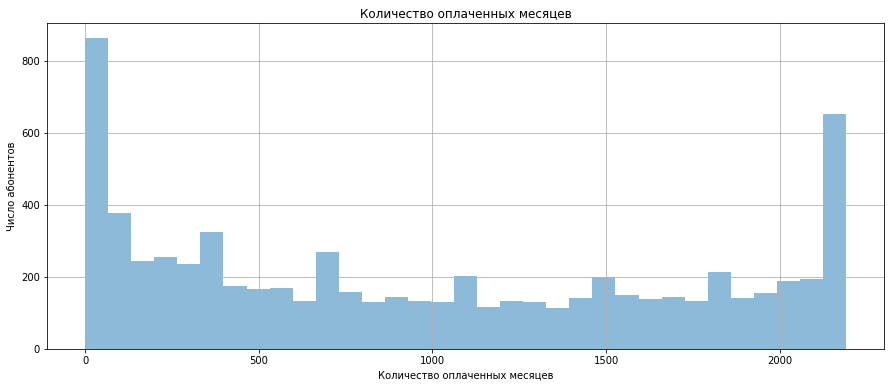

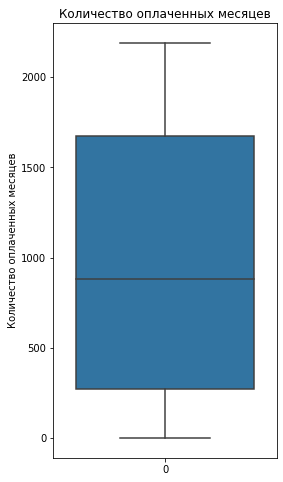

In [ ]:
distribution(contract['CountMonthPaid'], 'Количество оплаченных месяцев', 'Число абонентов', 'Количество оплаченных месяцев')

#### MonthlyCharges

In [ ]:
contract['MonthlyCharges'].value_counts()

20.05     61
19.85     45
19.95     44
19.90     44
20.00     43
          ..
114.75     1
103.60     1
113.40     1
57.65      1
113.30     1
Name: MonthlyCharges, Length: 1585, dtype: int64

In [ ]:
contract['MonthlyCharges'].describe()

count    7043.000000
mean       64.761692
std        30.090047
min        18.250000
25%        35.500000
50%        70.350000
75%        89.850000
max       118.750000
Name: MonthlyCharges, dtype: float64

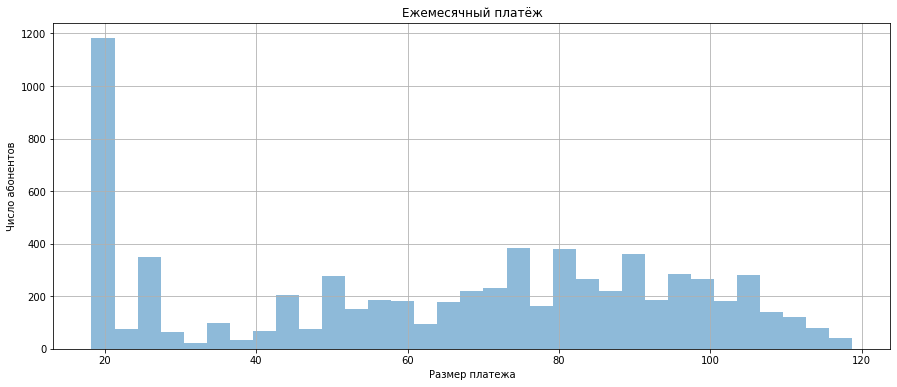

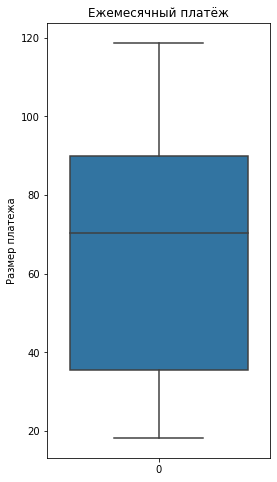

In [ ]:
distribution(contract['MonthlyCharges'], 'Ежемесячный платёж', 'Число абонентов', 'Размер платежа')

Аномальных значений не наблюдается. Видно большую категорию, предпочитающую минимальный платёж.

#### TotalCharges

In [ ]:
contract_copy = contract.copy()

In [ ]:
contract['TotalCharges'] = pd.to_numeric(contract['TotalCharges'], errors = 'coerce')

In [ ]:
contract['TotalCharges'].isna().sum()

11

11 значений не получилось преобразовать в числовой тип. Теперь на их месте пропуски. 

In [ ]:
contract[contract['TotalCharges'].isna()]

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,BeginMonth,BeginYear,End,LastDate,CountMonthPaid
488,4472-LVYGI,2020-02-01,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,2,2020,0,2020-02-01,0
753,3115-CZMZD,2020-02-01,No,Two year,No,Mailed check,20.25,NaN,2,2020,0,2020-02-01,0
936,5709-LVOEQ,2020-02-01,No,Two year,No,Mailed check,80.85,NaN,2,2020,0,2020-02-01,0
1082,4367-NUYAO,2020-02-01,No,Two year,No,Mailed check,25.75,NaN,2,2020,0,2020-02-01,0
1340,1371-DWPAZ,2020-02-01,No,Two year,No,Credit card (automatic),56.05,NaN,2,2020,0,2020-02-01,0
3331,7644-OMVMY,2020-02-01,No,Two year,No,Mailed check,19.85,NaN,2,2020,0,2020-02-01,0
3826,3213-VVOLG,2020-02-01,No,Two year,No,Mailed check,25.35,NaN,2,2020,0,2020-02-01,0
4380,2520-SGTTA,2020-02-01,No,Two year,No,Mailed check,20.00,NaN,2,2020,0,2020-02-01,0
5218,2923-ARZLG,2020-02-01,No,One year,Yes,Mailed check,19.70,NaN,2,2020,0,2020-02-01,0
6670,4075-WKNIU,2020-02-01,No,Two year,No,Mailed check,73.35,NaN,2,2020,0,2020-02-01,0


Все они объединены одинаковой BeginDate. Быть может, это ошибка ввода. Проверим на непреобразованных данных. 

In [ ]:
nan_index = contract[contract['TotalCharges'].isna()].index

In [ ]:
contract_copy.query('index in @nan_index')

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,BeginMonth,BeginYear,End,LastDate,CountMonthPaid
488,4472-LVYGI,2020-02-01,No,Two year,Yes,Bank transfer (automatic),52.55,,2,2020,0,2020-02-01,0
753,3115-CZMZD,2020-02-01,No,Two year,No,Mailed check,20.25,,2,2020,0,2020-02-01,0
936,5709-LVOEQ,2020-02-01,No,Two year,No,Mailed check,80.85,,2,2020,0,2020-02-01,0
1082,4367-NUYAO,2020-02-01,No,Two year,No,Mailed check,25.75,,2,2020,0,2020-02-01,0
1340,1371-DWPAZ,2020-02-01,No,Two year,No,Credit card (automatic),56.05,,2,2020,0,2020-02-01,0
3331,7644-OMVMY,2020-02-01,No,Two year,No,Mailed check,19.85,,2,2020,0,2020-02-01,0
3826,3213-VVOLG,2020-02-01,No,Two year,No,Mailed check,25.35,,2,2020,0,2020-02-01,0
4380,2520-SGTTA,2020-02-01,No,Two year,No,Mailed check,20.00,,2,2020,0,2020-02-01,0
5218,2923-ARZLG,2020-02-01,No,One year,Yes,Mailed check,19.70,,2,2020,0,2020-02-01,0
6670,4075-WKNIU,2020-02-01,No,Two year,No,Mailed check,73.35,,2,2020,0,2020-02-01,0


В ячейках - пусто, нет значений. А в CountMonthPaid нули. Дата заключения контракта совпадает с датой выгрузки данных.

Мы планировали заменить nan на произведение ежемесячного платежа срок, который длился контракт, но всё проще - заменим нулями. Удалять не станем - такой тип клиентов тоже будет встечаться в работе модели.

Для сравнения суммарного платежа из таблицы с полученным нами суммарным платежом сравним их в срезе данных без пропусков:

In [ ]:
contract_notnan = contract.query('index not in @nan_index')

In [ ]:
contract_notnan['TotalPaid'] = contract_notnan['CountMonthPaid'] * (contract_notnan['MonthlyCharges']/30.43)

30.43 - усредненное количество дней в месяце, подобрано эмпирически.

In [ ]:
mae(contract_notnan['TotalCharges'], contract_notnan['TotalPaid'])

45.210447288149346

Получившуюся ошибку можно списать на огрехи округления и на тот факт, что началом любого контракта записано первое число месяца.

Заменим пропуски

In [ ]:
#contract['TotalCharges'] = contract['TotalCharges'].fillna(contract['CountMonthPaid'] * (contract['MonthlyCharges']/30.43))

In [ ]:
contract['TotalCharges'] = contract['TotalCharges'].fillna(0.0)

In [ ]:
contract['TotalCharges'].isna().sum()

0

In [ ]:
contract.query('index in @nan_index')['CountMonthPaid']

488     0
753     0
936     0
1082    0
1340    0
3331    0
3826    0
4380    0
5218    0
6670    0
6754    0
Name: CountMonthPaid, dtype: int64

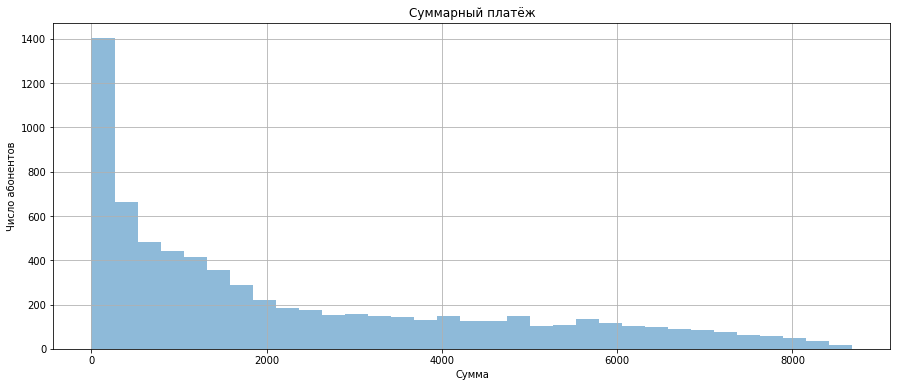

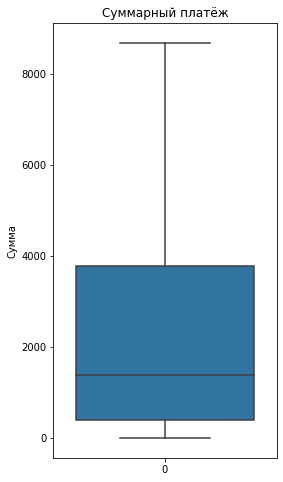

In [ ]:
distribution(contract['TotalCharges'], 'Суммарный платёж', 'Число абонентов', 'Сумма')

Выбросов не видно. Нулевых значений нет. С ростом размера суммарного платежа количество плательщиков меньше.

#### Type

In [ ]:
contract['Type'].value_counts()

Month-to-month    3875
Two year          1695
One year          1473
Name: Type, dtype: int64

В этом признаке речь о частоте платежей.

#### PaperlessBilling

Paperless – сервис для компаний и предпринимателей по обмену документами между собой в электронной форме. Paperless billing позволяет получить доступ к ежемесячной выписке по кредитной карте онлайн, а не получать копию по почте. 

In [ ]:
contract['PaperlessBilling'].value_counts()

Yes    4171
No     2872
Name: PaperlessBilling, dtype: int64

#### PaymentMethod

In [ ]:
contract['PaymentMethod'].value_counts()

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64

In [ ]:
contract.query('PaperlessBilling =="Yes"').pivot_table(index='PaymentMethod', values='PaperlessBilling', aggfunc='count')

,PaperlessBilling
PaymentMethod,
Bank transfer (automatic),891
Credit card (automatic),882
Electronic check,1742
Mailed check,656


На первый взгляд существенного разделения безбумажного биллинга и способа оплаты нет.

### internet

In [ ]:
internet.head()

,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,Fiber optic,No,No,No,No,No,No


In [ ]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5517 entries, 0 to 5516
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        5517 non-null   object
 1   InternetService   5517 non-null   object
 2   OnlineSecurity    5517 non-null   object
 3   OnlineBackup      5517 non-null   object
 4   DeviceProtection  5517 non-null   object
 5   TechSupport       5517 non-null   object
 6   StreamingTV       5517 non-null   object
 7   StreamingMovies   5517 non-null   object
dtypes: object(8)
memory usage: 344.9+ KB


In [ ]:
internet.duplicated().sum()

0

Видим 5517 уникальных объектов с категориальными признаками. Пропусков нет. Типы данных похожи на корректные. 

#### customerID

In [ ]:
len(internet['customerID'].str.lower().unique())

5517

Повторяющихся id в таблице нет.

#### InternetService

In [ ]:
internet['InternetService'].value_counts()

Fiber optic    3096
DSL            2421
Name: InternetService, dtype: int64

* Fiber optic - оптическое волокно: обеспечивает высокую защищённость от несанкционированного доступа, низкое затухание сигнала при передаче информации на большие расстояния, возможность оперировать с чрезвычайно высокими скоростями передачи и пропускной способностью
* Цифровая абонентская линия (DSL) — это технология высокоскоростного Интернета, которая позволяет передавать цифровые данные по проводам телефонной сети. DSL не мешает телефонной линии; одна и та же линия может использоваться как для Интернет, так и для обычных телефонных служб. Скорость загрузки DSL колеблется между 384 Кбит/с и 20 Мбит/с.

#### OnlineSecurity

In [ ]:
internet['OnlineSecurity'].value_counts()

No     3498
Yes    2019
Name: OnlineSecurity, dtype: int64

Видимо, тут речь о наличии антивируса. Часто такая услуга представляется в виде платной подписки. 

#### OnlineBackup

In [ ]:
internet['OnlineBackup'].value_counts()

No     3088
Yes    2429
Name: OnlineBackup, dtype: int64

Резервное копирование как дополнительная услуга.

#### DeviceProtection

In [ ]:
internet['DeviceProtection'].value_counts()

No     3095
Yes    2422
Name: DeviceProtection, dtype: int64

Вероятно, речь об услуге "защиты от кражи".

#### TechSupport

In [ ]:
internet['TechSupport'].value_counts()

No     3473
Yes    2044
Name: TechSupport, dtype: int64

Какая-то особая техническая поддержка как отдельная подписка.

#### StreamingTV

In [ ]:
internet['StreamingTV'].value_counts()

No     2810
Yes    2707
Name: StreamingTV, dtype: int64

Наличие подписки на TV.

#### StreamingMovies

In [ ]:
internet['StreamingMovies'].value_counts()

No     2785
Yes    2732
Name: StreamingMovies, dtype: int64

Наличие подписки на кино.

### personal

In [ ]:
personal.head()

,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No


In [ ]:
personal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     7043 non-null   object
 1   gender         7043 non-null   object
 2   SeniorCitizen  7043 non-null   int64 
 3   Partner        7043 non-null   object
 4   Dependents     7043 non-null   object
dtypes: int64(1), object(4)
memory usage: 275.2+ KB


In [ ]:
personal.duplicated().sum()

0

7043 уникальных записи без пропусков

#### customerID

In [ ]:
len(personal['customerID'].str.lower().unique())

7043

Повторяющихся id в таблице нет.

#### gender

In [ ]:
personal['gender'].value_counts()

Male      3555
Female    3488
Name: gender, dtype: int64

#### SeniorCitizen

In [ ]:
personal['SeniorCitizen'].value_counts()

0    5901
1    1142
Name: SeniorCitizen, dtype: int64

Является ли абонент пенсионером.

#### Partner

In [ ]:
personal['Partner'].value_counts()

No     3641
Yes    3402
Name: Partner, dtype: int64

Есть ли партнет.

#### Dependents

In [ ]:
personal['Dependents'].value_counts()

No     4933
Yes    2110
Name: Dependents, dtype: int64

Является ли абонент иждивенцем.

### phone

In [ ]:
phone.head()

,customerID,MultipleLines
0,5575-GNVDE,No
1,3668-QPYBK,No
2,9237-HQITU,No
3,9305-CDSKC,Yes
4,1452-KIOVK,Yes


In [ ]:
phone.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6361 entries, 0 to 6360
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     6361 non-null   object
 1   MultipleLines  6361 non-null   object
dtypes: object(2)
memory usage: 99.5+ KB


In [ ]:
phone.duplicated().sum()

0

#### customerID

In [ ]:
len(phone['customerID'].str.lower().unique())

6361

Повторяющихся id в таблице нет.

#### MultipleLines

In [ ]:
phone['MultipleLines'].value_counts()

No     3390
Yes    2971
Name: MultipleLines, dtype: int64

Многоканальный аппарат.

### Общие customerID

Так как наш целевой признак живёт в таблице contract, будем искать совпадения с ней.

In [ ]:
contractID = contract['customerID']
internetID = internet['customerID']
personalID = personal['customerID']
phoneID = phone['customerID']

In [ ]:
print('Количество id в internet:', len(internet))
print('Количество совпавших с contract id:', len(contract.query('customerID in @internetID')))

Количество id в internet: 5517
Количество совпавших с contract id: 5517


In [ ]:
print('Количество id в personal:', len(personal))
print('Количество совпавших с contract id:', len(contract.query('customerID in @personalID')))

Количество id в personal: 7043
Количество совпавших с contract id: 7043


In [ ]:
print('Количество id в phone:', len(phone))
print('Количество совпавших с contract id:', len(contract.query('customerID in @phoneID')))

Количество id в phone: 6361
Количество совпавших с contract id: 6361


### Объединение таблиц

In [ ]:
data = contract.merge(internet, on = 'customerID',  how = 'left')
data = data.merge(personal, on = 'customerID',  how = 'left')
data = data.merge(phone, on = 'customerID',  how = 'left')

In [ ]:
len(data)

7043

In [ ]:
data.head()

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,BeginMonth,BeginYear,End,LastDate,CountMonthPaid,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,gender,SeniorCitizen,Partner,Dependents,MultipleLines
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85,1,2020,0,2020-02-01,31,DSL,No,Yes,No,No,No,No,Female,0,Yes,No,NaN
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.50,4,2017,0,2020-02-01,1036,DSL,Yes,No,Yes,No,No,No,Male,0,No,No,No
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15,10,2019,1,2019-12-01,61,DSL,Yes,Yes,No,No,No,No,Male,0,No,No,No
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75,5,2016,0,2020-02-01,1371,DSL,Yes,No,Yes,Yes,No,No,Male,0,No,No,NaN
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65,9,2019,1,2019-11-01,61,Fiber optic,No,No,No,No,No,No,Female,0,No,No,No


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   customerID        7043 non-null   object        
 1   BeginDate         7043 non-null   datetime64[ns]
 2   EndDate           7043 non-null   object        
 3   Type              7043 non-null   object        
 4   PaperlessBilling  7043 non-null   object        
 5   PaymentMethod     7043 non-null   object        
 6   MonthlyCharges    7043 non-null   float64       
 7   TotalCharges      7043 non-null   float64       
 8   BeginMonth        7043 non-null   int64         
 9   BeginYear         7043 non-null   int64         
 10  End               7043 non-null   int64         
 11  LastDate          7043 non-null   datetime64[ns]
 12  CountMonthPaid    7043 non-null   int64         
 13  InternetService   5517 non-null   object        
 14  OnlineSecurity    5517 n

In [ ]:
data.isna().mean()

customerID          0.000000
BeginDate           0.000000
EndDate             0.000000
Type                0.000000
PaperlessBilling    0.000000
PaymentMethod       0.000000
MonthlyCharges      0.000000
TotalCharges        0.000000
BeginMonth          0.000000
BeginYear           0.000000
End                 0.000000
LastDate            0.000000
CountMonthPaid      0.000000
InternetService     0.216669
OnlineSecurity      0.216669
OnlineBackup        0.216669
DeviceProtection    0.216669
TechSupport         0.216669
StreamingTV         0.216669
StreamingMovies     0.216669
gender              0.000000
SeniorCitizen       0.000000
Partner             0.000000
Dependents          0.000000
MultipleLines       0.096834
dtype: float64

In [ ]:
len(data.dropna())/len(data)

0.686497231293483

Если удалим строки с пропусками, лишимся 31.4% датасета. 

Можем предположить, что раз пользователя нет в таблице с типом услуг, то это значит, что он не пользуется данными услугами. В таком случае мы можем заменить пропуски на 'No' (Почти все пропуски в категориальных признаках Yes/No). Также можно исследовать, насколько вообще важны данные признаки для предсказания оттока. 

Остается открытым вопрос с InternetService, где мы выбираем не из да/нет, а из двух типов связи. И, как выяснится чуть позже, этот признак окажется весьма важным для анализа, и, возможно, для машинного обучения тоже.

In [ ]:
features_with_nan = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'MultipleLines']
for feature in features_with_nan:
  data[feature] = data[feature].fillna('No')

In [ ]:
#data['OnlineSecurity'] = data['OnlineSecurity'].fillna('No')
#data['OnlineBackup'] = data['OnlineBackup'].fillna('No')
#data['DeviceProtection'] =data['DeviceProtection'].fillna('No')
#data['TechSupport'] = data['TechSupport'].fillna('No')
#data['StreamingTV'] = data['StreamingTV'].fillna('No')
#data['StreamingMovies'] = data['StreamingMovies'].fillna('No')
#data['MultipleLines'] = data['MultipleLines'].fillna('No')

OnlineSecurity
OnlineBackup
DeviceProtection
TechSupport
StreamingTV
StreamingMovies
MultipleLines

## Исследовательский анализ данных

End - целевой признак.
* 0 - контракт действителен
* 1 - контракт разорван

### MonthlyCharges

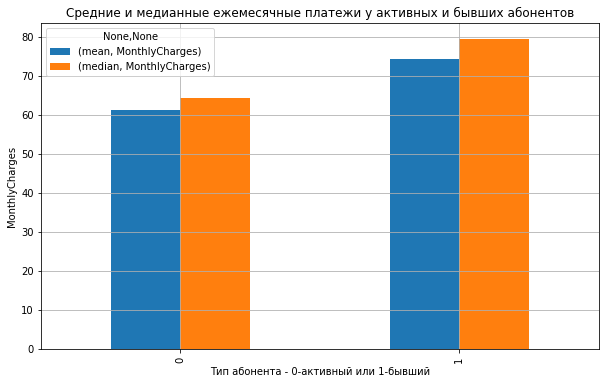

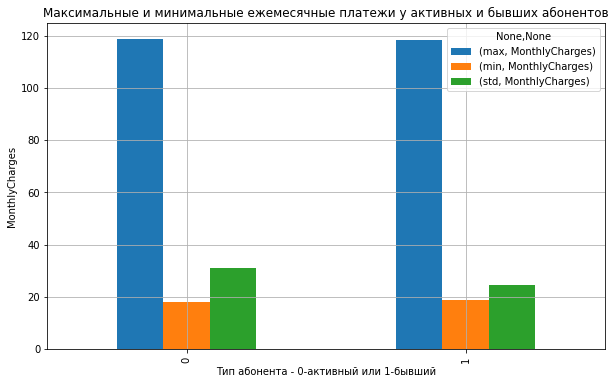

In [ ]:
data.pivot_table(index='End', values='MonthlyCharges', aggfunc=['mean', 'median']).plot(kind='bar', 
                                                                                   figsize=(10,6), 
                                                                                   grid=True)
plt.title('Средние и медианные ежемесячные платежи у активных и бывших абонентов')
plt.xlabel('Тип абонента - 0-активный или 1-бывший')
plt.ylabel('MonthlyCharges')
plt.show()

data.pivot_table(index='End', values='MonthlyCharges', aggfunc=['max', 'min', 'std']).plot(kind='bar', 
                                                                                      figsize=(10,6), 
                                                                                      grid=True)
plt.title('Максимальные и минимальные ежемесячные платежи у активных и бывших абонентов')
plt.xlabel('Тип абонента - 0-активный или 1-бывший')
plt.ylabel('MonthlyCharges')
plt.show()

Можно отметить, что разорвавшие контакт абоненты с реднем платили чуть больше остальных.

### TotalCharges

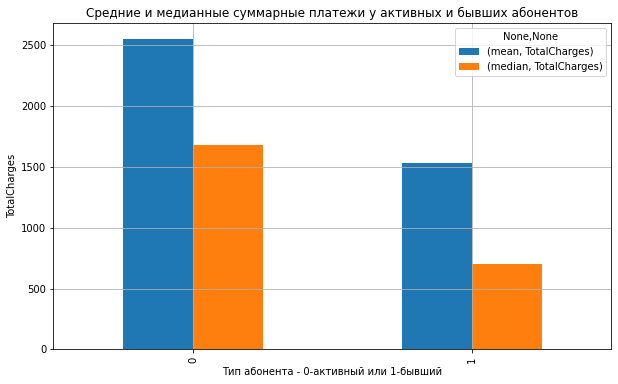

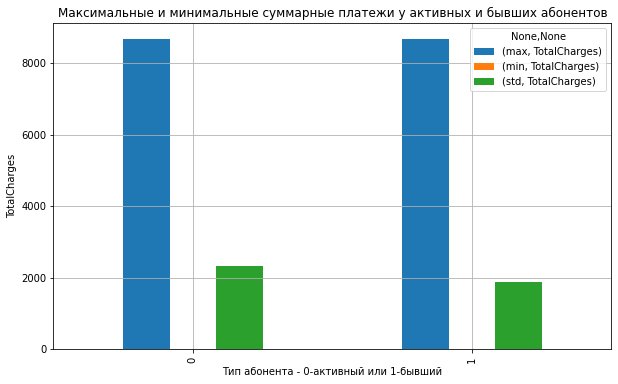

In [ ]:
data.pivot_table(index='End', values='TotalCharges', aggfunc=['mean', 'median']).plot(kind='bar', 
                                                                                        figsize=(10,6), 
                                                                                        grid=True)
plt.title('Средние и медианные суммарные платежи у активных и бывших абонентов')
plt.xlabel('Тип абонента - 0-активный или 1-бывший')
plt.ylabel('TotalCharges')
plt.show()

data.pivot_table(index='End', values='TotalCharges', aggfunc=['max', 'min', 'std']).plot(kind='bar', 
                                                                                        figsize=(10,6), 
                                                                                        grid=True)
plt.title('Максимальные и минимальные суммарные платежи у активных и бывших абонентов')
plt.xlabel('Тип абонента - 0-активный или 1-бывший')
plt.ylabel('TotalCharges')
plt.show()

Средний и медианный суммарные платежи у бывших абонентов ниже, чем у настоящих. Это при том, что ежемесячно они платили больше. Возможная причина: разорвавшие контракты клиенты в среднем не так долго пользуются услугами оператора, как настоящие. 

### CountMonthPaid

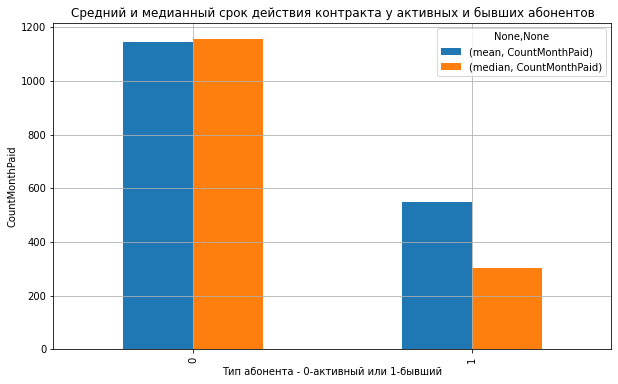

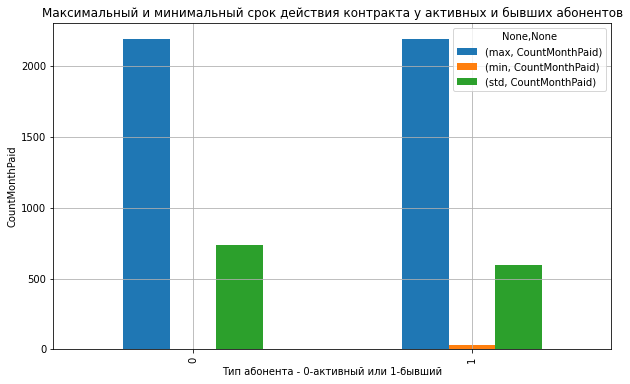

In [ ]:
data.pivot_table(index='End', values='CountMonthPaid', aggfunc=['mean', 'median']).plot(kind='bar', 
                                                                                        figsize=(10,6), 
                                                                                        grid=True)
plt.title('Средний и медианный срок действия контракта у активных и бывших абонентов')
plt.xlabel('Тип абонента - 0-активный или 1-бывший')
plt.ylabel('CountMonthPaid')
plt.show()

data.pivot_table(index='End', values='CountMonthPaid', aggfunc=['max', 'min', 'std']).plot(kind='bar', 
                                                                                        figsize=(10,6), 
                                                                                        grid=True)
plt.title('Максимальный и минимальный срок действия контракта у активных и бывших абонентов')
plt.xlabel('Тип абонента - 0-активный или 1-бывший')
plt.ylabel('CountMonthPaid')
plt.show()

Похоже, догадка подтверждается среднее и медианное количество оплаченных месяцев у бывших абонентов почти в два раза ниже тех же показателей у настоящих абонентов.

### BeginDate

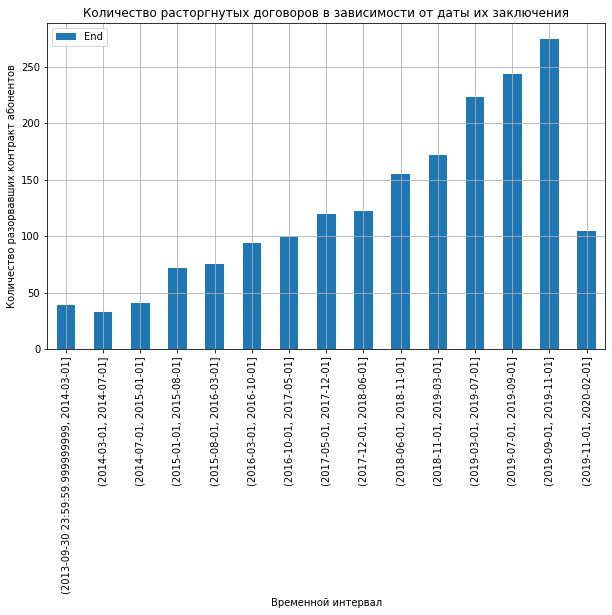

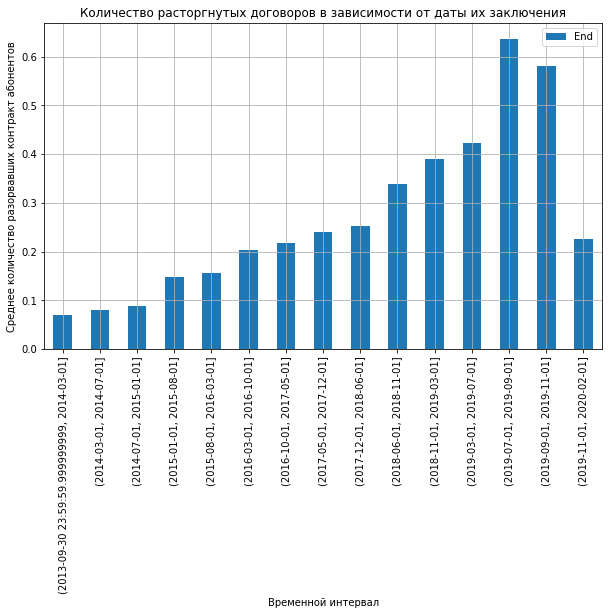

In [ ]:
data.pivot_table(index=pd.qcut(data['BeginDate'], 15), values='End', aggfunc='sum').plot(kind='bar', 
                                                                                        figsize=(10,6), 
                                                                                        grid=True)
plt.title('Количество расторгнутых договоров в зависимости от даты их заключения')
plt.xlabel('Временной интервал')
plt.ylabel('Количество разорвавших контракт абонентов')
plt.show()

data.pivot_table(index=pd.qcut(data['BeginDate'], 15), values='End', aggfunc='mean').plot(kind='bar', 
                                                                                        figsize=(10,6), 
                                                                                        grid=True)
plt.title('Количество расторгнутых договоров в зависимости от даты их заключения')
plt.xlabel('Временной интервал')
plt.ylabel('Среднее количество разорвавших контракт абонентов')
plt.show()

Может наблюдать рост количества разорванных контрактов в зависимости от года их заключения. Он кажется достаточно равномерным, то есть непохоже на реакцию на какое-то событие. Возможно, устаревшие условия, неподходящие новые тарифы и т.п.

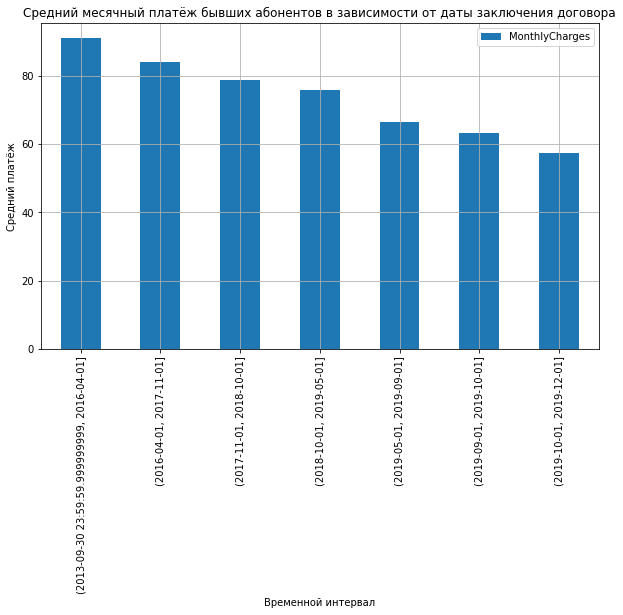

In [ ]:
data.query('End==1').pivot_table(index=pd.qcut(data.query('End==1')['BeginDate'], 7), values='MonthlyCharges', aggfunc='mean').plot(kind='bar', 
                                                                                        figsize=(10,6), 
                                                                                        grid=True)
plt.title('Средний месячный платёж бывших абонентов в зависимости от даты заключения договора')
plt.xlabel('Временной интервал')
plt.ylabel('Средний платёж')
plt.show()

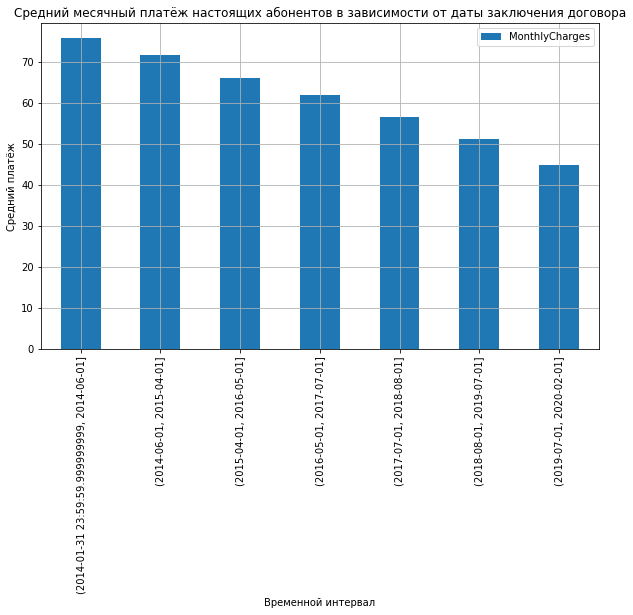

In [ ]:
data.query('End==0').pivot_table(index=pd.qcut(data.query('End==0')['BeginDate'], 7), values='MonthlyCharges', aggfunc='mean').plot(kind='bar', 
                                                                                        figsize=(10,6), 
                                                                                        grid=True)
plt.title('Средний месячный платёж настоящих абонентов в зависимости от даты заключения договора')
plt.xlabel('Временной интервал')
plt.ylabel('Средний платёж')
plt.show()

При этом мы видим, что средняя стоимость месячного платежа со временем падает, При этом у бывших абонентов она всё равно выше. 

### BeginMonth

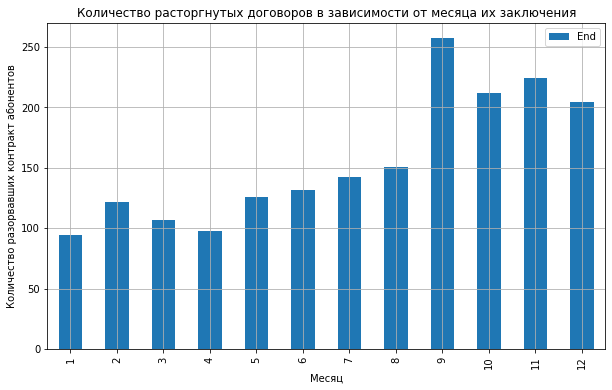

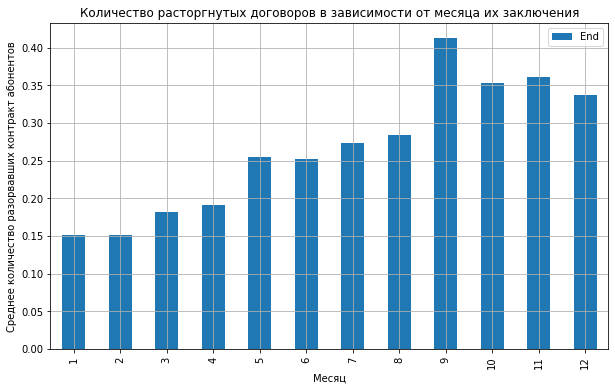

In [ ]:
data.pivot_table(index='BeginMonth', values='End', aggfunc='sum').plot(kind='bar', 
                                                                       figsize=(10,6), 
                                                                       grid=True)
plt.title('Количество расторгнутых договоров в зависимости от месяца их заключения')
plt.xlabel('Месяц')
plt.ylabel('Количество разорвавших контракт абонентов')
plt.show()

data.pivot_table(index='BeginMonth', values='End', aggfunc='mean').plot(kind='bar', 
                                                                        figsize=(10,6), 
                                                                        grid=True)
plt.title('Количество расторгнутых договоров в зависимости от месяца их заключения')
plt.xlabel('Месяц')
plt.ylabel('Среднее количество разорвавших контракт абонентов')
plt.show()

Не похоже, что есть какая-то сезонность. Здесь скорее отображается всё тот же тренд в течение года - новенькие уходят больше. 

### BeginYear

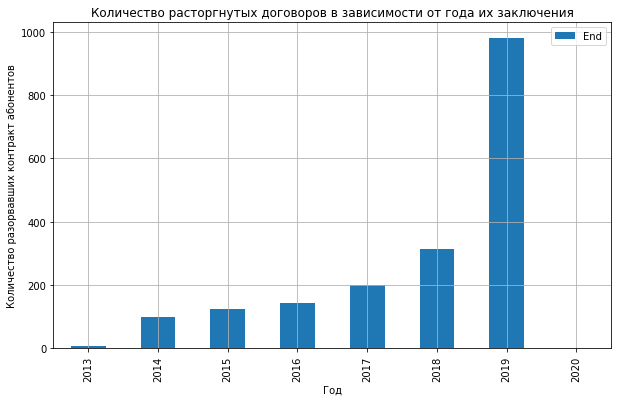

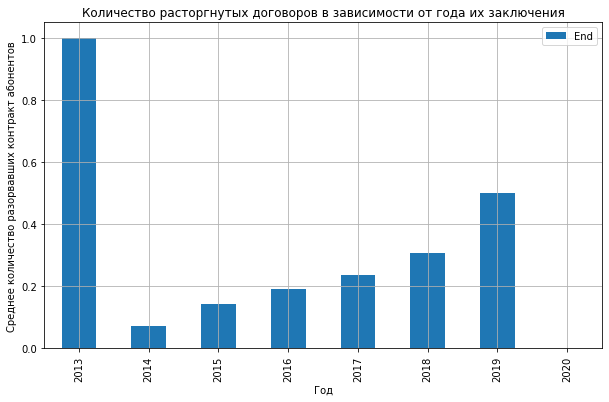

In [ ]:
data.pivot_table(index='BeginYear', values='End', aggfunc='sum').plot(kind='bar', 
                                                                      figsize=(10,6), 
                                                                      grid=True)
plt.title('Количество расторгнутых договоров в зависимости от года их заключения')
plt.xlabel('Год')
plt.ylabel('Количество разорвавших контракт абонентов')
plt.show()

data.pivot_table(index='BeginYear', values='End', aggfunc='mean').plot(kind='bar', 
                                                                       figsize=(10,6), 
                                                                       grid=True)
plt.title('Количество расторгнутых договоров в зависимости от года их заключения')
plt.xlabel('Год')
plt.ylabel('Среднее количество разорвавших контракт абонентов')
plt.show()

Из заключивших договора в 2019 году ушла почти половина. Из самых первых абонентов не осталось никого. 

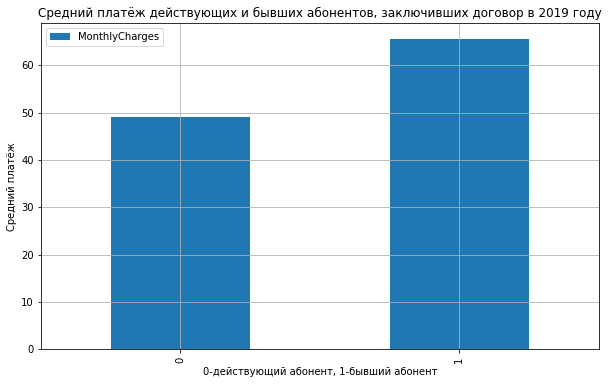

In [ ]:
data.query('BeginYear==2019').pivot_table(index='End', values='MonthlyCharges', aggfunc='mean').plot(kind='bar', 
                                                                                        figsize=(10,6), 
                                                                                        grid=True)
plt.title('Средний платёж действующих и бывших абонентов, заключивших договор в 2019 году')
plt.xlabel('0-действующий абонент, 1-бывший абонент')
plt.ylabel('Средний платёж')
plt.show()

Есть впечатление, что бывшие абоненты сразу заключали договора на не самых выгодных условиях. Неясно, отчего это зависело. Может, от региона, или от необходимости пользоваться роумингом.

### PaymentMethod

In [ ]:
def segment(index, title):
    pivot_1 = data.pivot_table(index=index, 
                 values='End', 
                 aggfunc='sum')
    pivot_0 = data.query('End==0').pivot_table(index=index, 
                                    values='End', 
                                    aggfunc='count')
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,10))
    ax1.pie(pivot_1, autopct='%1.1f%%')
    ax1.set_title('Бывшие абоненты')
    plt.ylabel('')
    
    ax2.pie(pivot_0, autopct='%1.1f%%')
    ax2.set_title('Настоящие абоненты')
    plt.legend(pivot_1.index, bbox_to_anchor=(1, 0.6))
    plt.ylabel('')
    plt.xlabel(title, fontsize=16)
    plt.show()


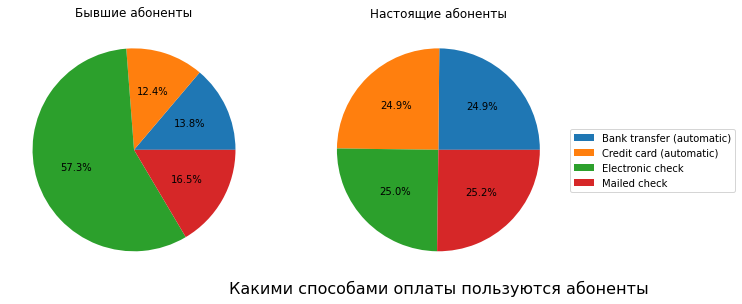

In [ ]:
segment(index ='PaymentMethod', 
        title = 'Какими способами оплаты пользуются абоненты')

Если настоящие абоненты по способам оплаты разделились примерно поровну, то разорвавшие контракт очевидно предпочитали electronic check

### PaperlessBilling

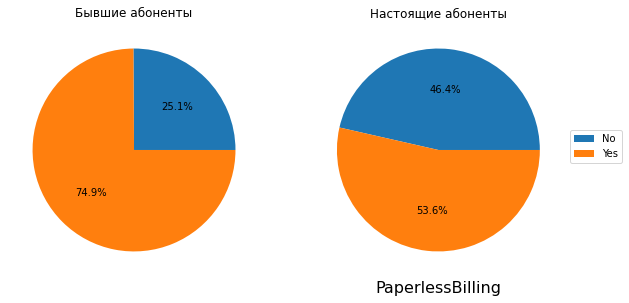

In [ ]:
segment(index ='PaperlessBilling', 
        title ='PaperlessBilling')

Возможность получать доступ к ежемесячной выписке по кредитной карте онлайн гораздо чаще пользуются действующие абоненты. 

### Internet

InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies

In [ ]:
internet_list = ['InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

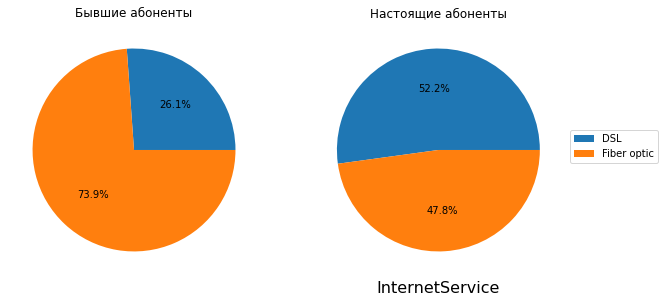

--------------------------------------------------------------------------------


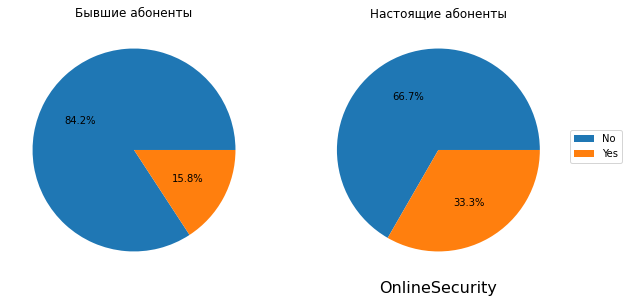

--------------------------------------------------------------------------------


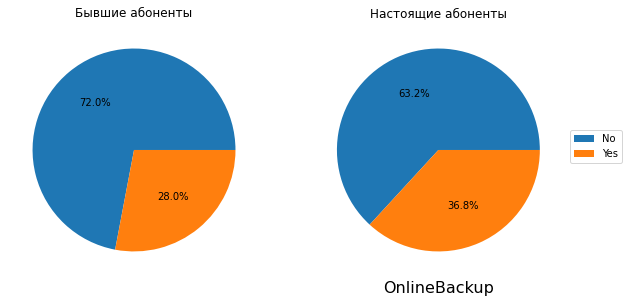

--------------------------------------------------------------------------------


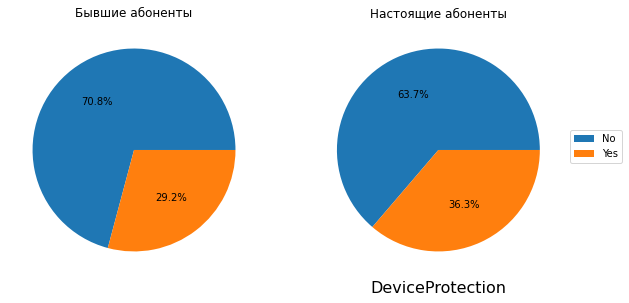

--------------------------------------------------------------------------------


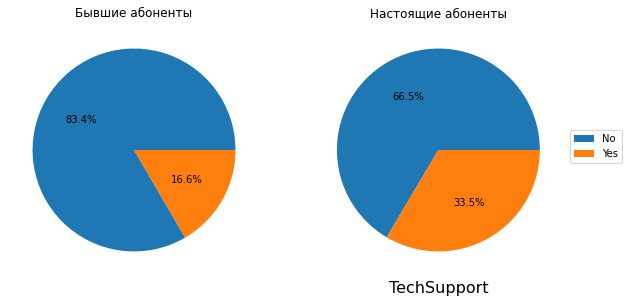

--------------------------------------------------------------------------------


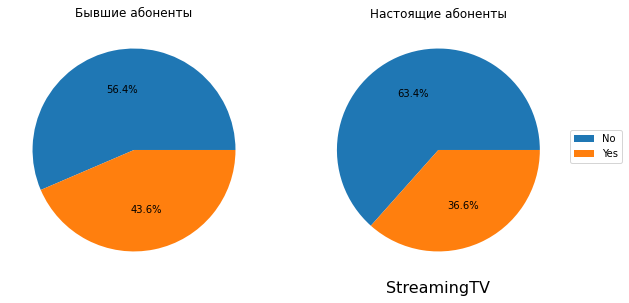

--------------------------------------------------------------------------------


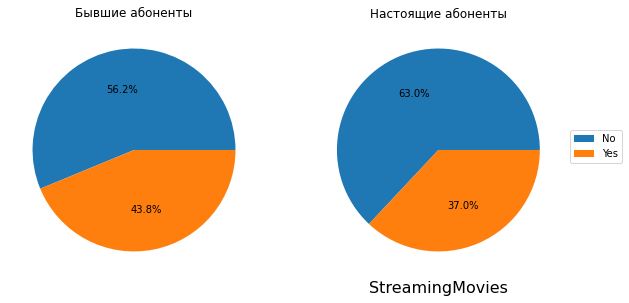

--------------------------------------------------------------------------------


In [ ]:
for i in internet_list:
  segment(index = i, 
        title = f'{i}')
  print('--------------------------------------------------------------------------------')

Бывшие абоненты 
* гораздо чаще предпочитали оптоволокно телефонной связи.
* гораздо реже покупали услуги по безопасности и обслуживанию.
* чаще подключали стриминговое телевидение и каталог фильмов.

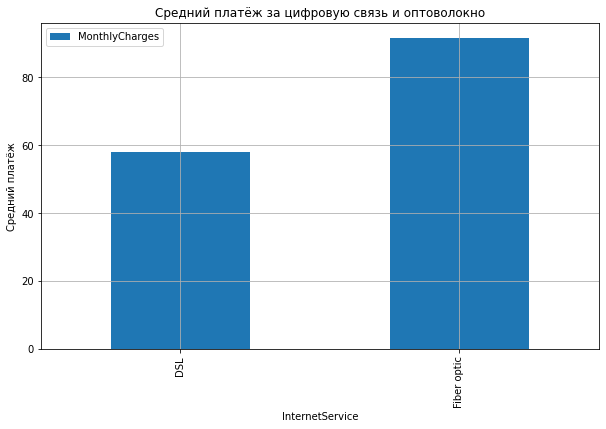

In [ ]:
data.pivot_table(index='InternetService', values='MonthlyCharges').plot(kind='bar', 
                                                                        figsize=(10,6), 
                                                                        grid=True)
plt.title('Средний платёж за цифровую связь и оптоволокно')
plt.xlabel('InternetService')
plt.ylabel('Средний платёж')
plt.show()

А оптоволокно дороже.

### Personal data

gender, SeniorCitizen, Partner, Dependents

In [ ]:
personal_list = ['gender', 'SeniorCitizen', 'Partner', 'Dependents']

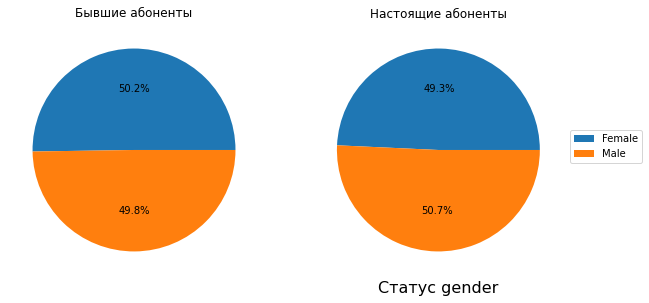

--------------------------------------------------------------------------------


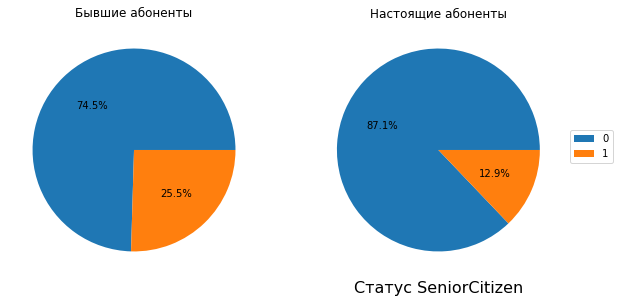

--------------------------------------------------------------------------------


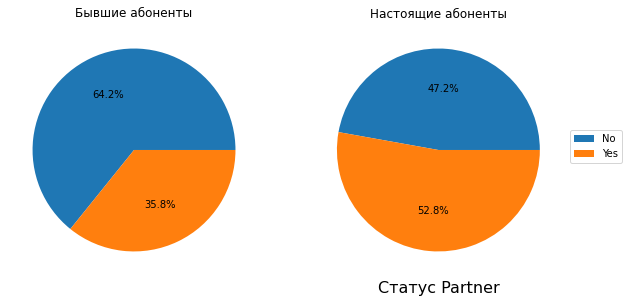

--------------------------------------------------------------------------------


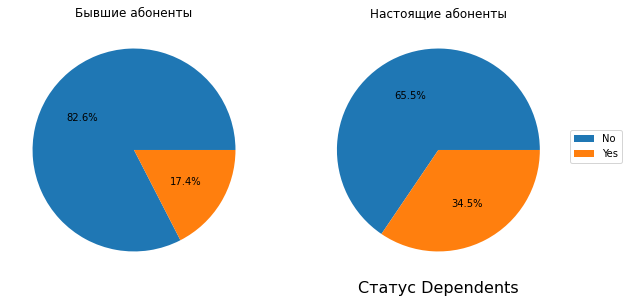

--------------------------------------------------------------------------------


In [ ]:
for i in personal_list:
  segment(index = i, 
        title = f'Статус {i}')
  print('--------------------------------------------------------------------------------')

Среди бывших абонентов 
* больше пенсионеров (и здесь можно предположить непродление контракта по естественным причинам)
* меньшее количество людей имеет партнёра
* серьёзно меньше иждивенцев

### MultipleLines

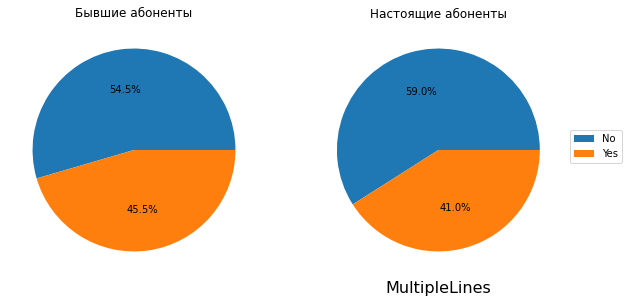

In [ ]:
segment(index ='MultipleLines', 
        title ='MultipleLines')

Существенного отличия по критерию многоканальности не наблюдается. 

### Type

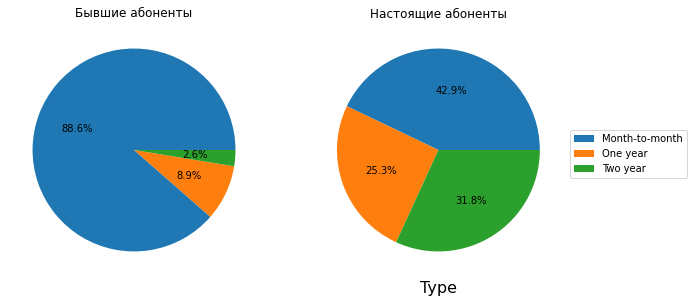

In [ ]:
segment(index ='Type', 
        title ='Type')

В подавляющем большинстве случаев бывшие абоненты предпочитали краткосрочные платежи, тогда как настоящие в предпочтениях разделились, большинство ориентировано на долгосрочное сотрудничество. 

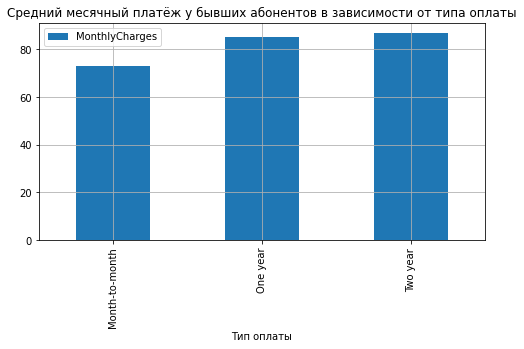

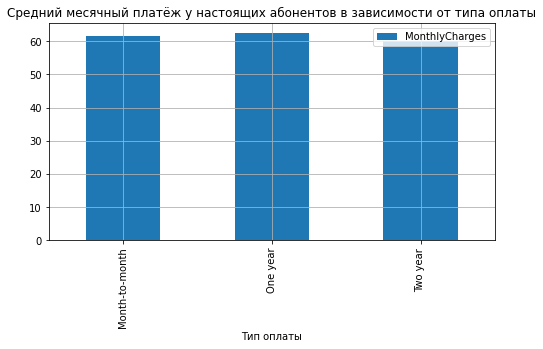

In [ ]:
data.query('End==1').pivot_table(index='Type', values='MonthlyCharges').plot(kind='bar', 
                                                             figsize=(8,4), 
                                                             grid=True)
plt.title('Средний месячный платёж у бывших абонентов в зависимости от типа оплаты') 
plt.xlabel('Тип оплаты')                                                           
data.query('End==0').pivot_table(index='Type', values='MonthlyCharges').plot(kind='bar', 
                                                             figsize=(8,4), 
                                                             grid=True)
plt.title('Средний месячный платёж у настоящих абонентов в зависимости от типа оплаты') 
plt.xlabel('Тип оплаты') 
plt.show()

Бывшие абоненты, платившие помесячно, платили в среднем меньшую сумму в месяц, чем другие бывшие абоненты. и Все бывшие абоненты (повторю) в среднем платили больше настоящих.


### Вывод

Нами были исследованы полученные данные. После их предварительной обработки и объединения мы смогли увидеть следующее. 

Можно отметить, что разорвавшие контакт абоненты среднем **платили больше** остальных и гораздо **меньше по времени пользовались услугами** оператора. Чем «новее» абонент, тем вероятнее, что он уйдёт. Из заключивших договора в 2019 году ушла почти половина.

Можно было бы предположить, что причина недовольство может заключаться в постепенном росте цен. Однако мы видим тенденцию к падению цен на связь. И видим, что у договоров, заключенных в один год может существенно разниться ежемесячный платёж. Бывшие абоненты платили больше, меньше тратя деньги на дополнительные услуги.

В подавляющем большинстве случаев бывшие абоненты предпочитали **краткосрочные платежи**, тогда как настоящие в предпочтениях разделились. При этом мы видим, что платить помесячно бывшим абонентам было выгоднее.

Если настоящие абоненты по способам оплаты разделились примерно поровну, то разорвавшие контракт очевидно **предпочитали electronic check** и гораздо **реже желали иметь возможность получать доступ к ежемесячной выписке** по кредитной карте онлайн.

Также бывшие абоненты гораздо чаще **предпочитали оптоволокно** цифровой связи и гораздо **реже покупали дополнительные услуги** по безопасности и обслуживанию, чаще подключали стриминговое телевидение и каталог фильмов.

Среди бывших абонентов **больше пенсионеров, меньшее количество людей имеет партнёра, серьёзно меньше иждивенцев**.

На основе примерно портрета бывшего абонента, а так же информации о том, что проводной интернет стоит дороже можем **сформулировать гипотезу**: 
*бывшие абоненты нуждаются в быстром интернете, предпочитают оптоволокно, и их не устраивает цена на именно этот продукт интернет-провайдера*.

## Подготовка датасетов

In [ ]:
data_to_fit = data.drop(['customerID', 'BeginDate', 'EndDate', 'LastDate'], axis=1)

In [ ]:
data_to_fit.isna().mean()

Type                0.000000
PaperlessBilling    0.000000
PaymentMethod       0.000000
MonthlyCharges      0.000000
TotalCharges        0.000000
BeginMonth          0.000000
BeginYear           0.000000
End                 0.000000
CountMonthPaid      0.000000
InternetService     0.216669
OnlineSecurity      0.000000
OnlineBackup        0.000000
DeviceProtection    0.000000
TechSupport         0.000000
StreamingTV         0.000000
StreamingMovies     0.000000
gender              0.000000
SeniorCitizen       0.000000
Partner             0.000000
Dependents          0.000000
MultipleLines       0.000000
dtype: float64

In [ ]:
# датасет без пропусков

data_1 = data_to_fit.dropna()
data_1.shape

(5517, 21)

In [ ]:
# датасет без столбца с пропусками
data_2 = data_to_fit.drop(['InternetService'], axis=1)
data_2.shape

(7043, 20)

### Выделение целевого признака

In [ ]:
features_1 = data_1.drop(['End'], axis=1)
target_1 = data_1['End']

In [ ]:
features_2 = data_2.drop(['End'], axis=1)
target_2 = data_2['End']

### Категориальные и числовые признаки

#### Числовые признаки

In [ ]:
data.dtypes

customerID                  object
BeginDate           datetime64[ns]
EndDate                     object
Type                        object
PaperlessBilling            object
PaymentMethod               object
MonthlyCharges             float64
TotalCharges               float64
BeginMonth                   int64
BeginYear                    int64
End                          int64
LastDate            datetime64[ns]
CountMonthPaid               int64
InternetService             object
OnlineSecurity              object
OnlineBackup                object
DeviceProtection            object
TechSupport                 object
StreamingTV                 object
StreamingMovies             object
gender                      object
SeniorCitizen                int64
Partner                     object
Dependents                  object
MultipleLines               object
dtype: object

In [ ]:
numeric = []
for feature in data.columns:
    if feature !='End': 
        if feature !='SeniorCitizen':
            if data[feature].dtype == float or data[feature].dtype == int:
                numeric.append(feature)
numeric

['MonthlyCharges', 'TotalCharges', 'BeginMonth', 'BeginYear', 'CountMonthPaid']

##### Корреляции

In [ ]:
data_corr = data[numeric].corr()
data_corr.style.background_gradient(cmap='coolwarm')

,MonthlyCharges,TotalCharges,BeginMonth,BeginYear,CountMonthPaid
MonthlyCharges,1.000000,0.651174,-0.018072,-0.264251,0.247754
TotalCharges,0.651174,1.000000,-0.194289,-0.819539,0.826109
BeginMonth,-0.018072,-0.194289,1.000000,0.081542,-0.230318
BeginYear,-0.264251,-0.819539,0.081542,1.000000,-0.987411
CountMonthPaid,0.247754,0.826109,-0.230318,-0.987411,1.000000


Ожидаемо высокие корреляции между 
* ежемесячными платежами и суммарными платежами, 
* количеством оплаченных месяцев и суммарными платежами.

Обратные корреляции между 
* количеством оплаченных месяцев и годом старта договора, 
* суммарными платежами и годом старта договора.

Исходя из этого нам придется избавиться либо от TotalCharges и BeginYear, либо от TotalCharges и CountMonthPaid.

Есть ещё один аргумент в пользу удаления признаков. Нам нужно не допустить утечки целевого признака в данные. Это значит, что в данных не может ни напрямую, ни косвенно содержаться дата разрыва договора. Сочетание CountMonthPaid и BeginYear и/или CountMonthPaid и BeginMonth указывают на эту дату. Один признак CountMonthPaid (количество дней) без указания года и месяца заключения и года и месяца завершения/выгрузки не похож на опасный, так как просто указывает на срок длительности контракта и будет присутствовать и в тех данных на которых потом будет работать модель. 
То же и BeginYear - он может быть использован без CountMonthPaid.

Значит, при отборе признаков для каждой модели мы можем удалить один из них. А пока удалим очевидно неподходящие нам данные.

In [ ]:
numeric.remove('TotalCharges')

In [ ]:
numeric.remove('BeginMonth')
features_1 = features_1.drop(['BeginMonth', 'TotalCharges'],axis=1)
features_2 = features_2.drop(['BeginMonth', 'TotalCharges'],axis=1)

#### Категориальные признаки

Для двух выборок

In [ ]:
categorical_1 = features_1.drop(numeric, axis=1).columns.to_list()

categorical_2 = features_2.drop(numeric, axis=1).columns.to_list()


In [ ]:
categorical_1

['Type',
 'PaperlessBilling',
 'PaymentMethod',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'MultipleLines']

In [ ]:
categorical_2

['Type',
 'PaperlessBilling',
 'PaymentMethod',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'MultipleLines']

##### OHE

Закодируем категориальные признаки. 

In [ ]:
features_1.shape

(5517, 18)

In [ ]:
features_1 = pd.get_dummies(features_1, columns=categorical_1, drop_first=True)
features_1.head()

,MonthlyCharges,BeginYear,CountMonthPaid,Type_One year,Type_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,InternetService_Fiber optic,OnlineSecurity_Yes,OnlineBackup_Yes,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,gender_Male,SeniorCitizen_1,Partner_Yes,Dependents_Yes,MultipleLines_Yes
0,29.85,2020,31,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0
1,56.95,2017,1036,1,0,0,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0
2,53.85,2019,61,0,0,1,0,0,1,0,1,1,0,0,0,0,1,0,0,0,0
3,42.30,2016,1371,1,0,0,0,0,0,0,1,0,1,1,0,0,1,0,0,0,0
4,70.70,2019,61,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
features_1.shape

(5517, 21)

In [ ]:
features_1.dtypes

MonthlyCharges                           float64
BeginYear                                  int64
CountMonthPaid                             int64
Type_One year                              uint8
Type_Two year                              uint8
PaperlessBilling_Yes                       uint8
PaymentMethod_Credit card (automatic)      uint8
PaymentMethod_Electronic check             uint8
PaymentMethod_Mailed check                 uint8
InternetService_Fiber optic                uint8
OnlineSecurity_Yes                         uint8
OnlineBackup_Yes                           uint8
DeviceProtection_Yes                       uint8
TechSupport_Yes                            uint8
StreamingTV_Yes                            uint8
StreamingMovies_Yes                        uint8
gender_Male                                uint8
SeniorCitizen_1                            uint8
Partner_Yes                                uint8
Dependents_Yes                             uint8
MultipleLines_Yes   

In [ ]:
features_2 = pd.get_dummies(features_2, columns=categorical_2, drop_first=True)

### Разделение выборок на тренировочную, валидационную и тестовую

Выборка с удалёнными пропусками

In [ ]:
features_train_1, features_valid_test_1, target_train_1, target_valid_test_1 = train_test_split(features_1, 
                                                                                                target_1, 
                                                                                                test_size=0.4, 
                                                                                                stratify=target_1, 
                                                                                                random_state=12345)
features_valid_1, features_test_1, target_valid_1, target_test_1 = train_test_split(features_valid_test_1, 
                                                                                    target_valid_test_1, 
                                                                                    test_size=0.5, 
                                                                                    stratify=target_valid_test_1, 
                                                                                    random_state=12345)

Выборка с удаленным столбцом, содержащим пропуски

In [ ]:
features_train_2, features_valid_test_2, target_train_2, target_valid_test_2 = train_test_split(features_2, 
                                                                                                target_2, 
                                                                                                test_size=0.4, 
                                                                                                stratify=target_2, 
                                                                                                random_state=12345)
features_valid_2, features_test_2, target_valid_2, target_test_2 = train_test_split(features_valid_test_2, 
                                                                                    target_valid_test_2, 
                                                                                    test_size=0.5, 
                                                                                    stratify=target_valid_test_2, 
                                                                                    random_state=12345)

### Масштабирование числовых признаков

In [ ]:
scaler_1 = StandardScaler()
scaler_1.fit(features_train_1[numeric])
features_train_1[numeric] = scaler_1.transform(features_train_1[numeric])
features_valid_1[numeric] = scaler_1.transform(features_valid_1[numeric])
features_test_1[numeric] = scaler_1.transform(features_test_1[numeric])

In [ ]:
scaler_2 = StandardScaler()
scaler_2.fit(features_train_2[numeric])
features_train_2[numeric] = scaler_2.transform(features_train_2[numeric])
features_valid_2[numeric] = scaler_2.transform(features_valid_2[numeric])
features_test_2[numeric] = scaler_2.transform(features_test_2[numeric])

In [ ]:
features_train_1.head()

,MonthlyCharges,BeginYear,CountMonthPaid,Type_One year,Type_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,InternetService_Fiber optic,OnlineSecurity_Yes,OnlineBackup_Yes,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,gender_Male,SeniorCitizen_1,Partner_Yes,Dependents_Yes,MultipleLines_Yes
6544,1.265873,-0.436048,0.388737,0,0,1,0,0,0,1,0,1,1,0,1,1,0,1,0,0,1
6059,-1.675255,-0.436048,0.266335,1,0,1,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0
4737,1.756441,-1.461498,1.616795,0,1,1,0,0,0,1,1,1,1,1,1,1,0,0,1,0,1
1042,-0.310791,0.589401,-0.755926,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,1,0
5587,0.652092,-0.436048,0.554182,1,0,1,0,0,0,1,0,1,1,0,1,0,0,1,0,0,0


### Upsampling

В рамках борьбы с дисбалансом попробуем обучение на увеличенной выборке с равными классами.

In [ ]:
def upsample(features, target):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]
    repeat = round((len(features_zeros)/len(features_ones)))

    features_upsampled = pd.concat([features_zeros] + [features_ones]*repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones]*repeat)
    
    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=12345)
    return features_upsampled, target_upsampled


In [ ]:
features_train_upsampled_1, target_train_upsampled_1 = upsample(features_train_1, 
                                                                target_train_1)

In [ ]:
features_train_upsampled_2, target_train_upsampled_2 = upsample(features_train_2, 
                                                                target_train_2)

In [ ]:
print(features_train_1.shape)
print(target_train_1.shape)
print(features_train_upsampled_1.shape)
print(target_train_upsampled_1.shape)

(3310, 21)
(3310,)
(4364, 21)
(4364,)


In [ ]:
print(features_train_2.shape)
print(target_train_2.shape)
print(features_train_upsampled_2.shape)
print(target_train_upsampled_2.shape)

(4225, 20)
(4225,)
(6467, 20)
(6467,)


## Обучение

### Functions



In [ ]:
# общая функция для обучения и перебора гиперпараметров
def classification_fit(classifier, features, target, hyperparams, splits):
    model = classifier
    cross_validation = StratifiedKFold(n_splits=splits,shuffle=True,random_state=12345)
    #roc_auc_scorer = make_scorer(roc_auc_score, greater_is_better=True, needs_threshold=True)
    grid = GridSearchCV(model, hyperparams, scoring='roc_auc',cv=cross_validation, n_jobs=-1)
    grid.fit(features, target)
    best_params = grid.best_params_
    best_model = grid.best_estimator_
    score = grid.best_score_
    print('best_params:', best_params)
    print('best_score:', score)
    return best_model, score

In [ ]:
# функция для отбора признаков во всех выборках
def feature_selection(sample, feature):
    if sample == 1:
        features_train = features_train_1.drop(feature, axis=1)
        features_train_upsampled = features_train_upsampled_1.drop(feature, axis=1)
        features_valid = features_valid_1.drop(feature, axis=1)
        features_test = features_test_1.drop(feature, axis=1)
        return features_train, features_train_upsampled, features_valid, features_test
    if sample == 2:
        features_train = features_train_2.drop(feature, axis=1)
        features_train_upsampled = features_train_upsampled_2.drop(feature, axis=1)
        features_valid = features_valid_2.drop(feature, axis=1)
        features_test = features_test_2.drop(feature, axis=1)
        return features_train, features_train_upsampled, features_valid, features_test

In [ ]:
# функция для измерения качества модели
def evaluation(model, target, features):
    #predict
    predictions = model.predict(features)

    #accuracy_score
    accuracy = accuracy_score(target, predictions)

    #f1_score
    f1 = f1_score(target, predictions)

    #predict_proba
    probabilities = model.predict_proba(features)
    probabilities1 = probabilities[:, 1]

    #roc_auc_score
    auc_roc = roc_auc_score(target, probabilities1)
    
    print('METRICS')
    metrics = pd.DataFrame([auc_roc, accuracy, f1],
                           columns=['score'], 
                           index=['auc_roc', 'accuracy', 'f1'])
    display(metrics)
    print()

    #confusion_matrix
    print('CONFUSION MATRIX')
    confus_matrix = pd.DataFrame(confusion_matrix(target, predictions),
                                    columns=['pred_neg', 'pred_pos'], 
                                    index=['true_neg', 'true_pos'])
    display(confus_matrix)
    print()

    #roc_curve
    fpr, tpr, thresholds = roc_curve(target, probabilities1)
    plt.figure()
    plt.plot(fpr, tpr)
    plt.plot([0, 1], [0, 1], linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC-кривая')
    plt.show()
    return auc_roc, accuracy, f1



Чтобы увидеть степень важности признака для прогнозирования с помощью логистической регрессии умножим коэффициент на стандартное отклонение соответствующего признака. Знак (+-) указывает к какому классу склонна отнести обект модель при увеличении значения признака.

In [ ]:
# поиск важных признаков для логистической регрессии
def log_reg_importance(model, features):
    feature_importance = model.coef_
    feature_importance_logr_01 = pd.DataFrame(feature_importance, columns=features.columns).transpose()
    feature_importance_logr_01['std'] = features.std()
    feature_importance_logr_01.columns = ['coef', 'std']
    feature_importance_logr_01['importance'] = feature_importance_logr_01['coef']*feature_importance_logr_01['std']
    feature_importance_logr_01.sort_values(by='importance')
    feature_importance_logr_01['importance'].plot(kind='barh', 
                                                  figsize=(8,10), 
                                                  grid=True, 
                                                  title='Сравнение важности признаков', 
                                                  xlim=([-2.5,2.5]))

In [ ]:
# поиск важных признаков для остальных моделей классификации
def ensemble_importance(model, features):
    feature_importance = model.feature_importances_
    feature_importance_cat_balanced = pd.DataFrame(feature_importance, index=features.columns).sort_values(by=0, ascending=True)
    feature_importance_cat_balanced.plot(kind='barh', 
                                         figsize=(4,10), 
                                         title='Сравнение важности признаков')

### LogisticRegression

#### Balanced class weight

##### Sample_1

Эмпирическим способом отберем подходящие числовые признаки (будем смотреть по важности признаков для модели)

In [ ]:
#features = ['TotalCharges']
features = ['CountMonthPaid']
features_train_1_lr, features_train_upsampled_1_lr, features_valid_1_lr, features_test_1_lr = feature_selection(1, features)

Обучим модели и выберем одну с лучшими параметрами

In [ ]:
lr_balanced_1, score_lr_balanced_1 = classification_fit(LogisticRegression(), 
                                                    features_train_1_lr, 
                                                    target_train_1, 
                                                    hyperparams = [{'penalty' : ["l1", "l2"],
                                                                    'solver':['liblinear', 'lbfgs'],
                                                                    'C':np.arange(0.1, 3, 0.1),
                                                                    'class_weight':['balanced'],
                                                                    'random_state': [12345]}],
                                                    splits=5)

best_params: {'C': 0.1, 'class_weight': 'balanced', 'penalty': 'l1', 'random_state': 12345, 'solver': 'liblinear'}
best_score: 0.7990486642078356


Выделим важные для модели признаки

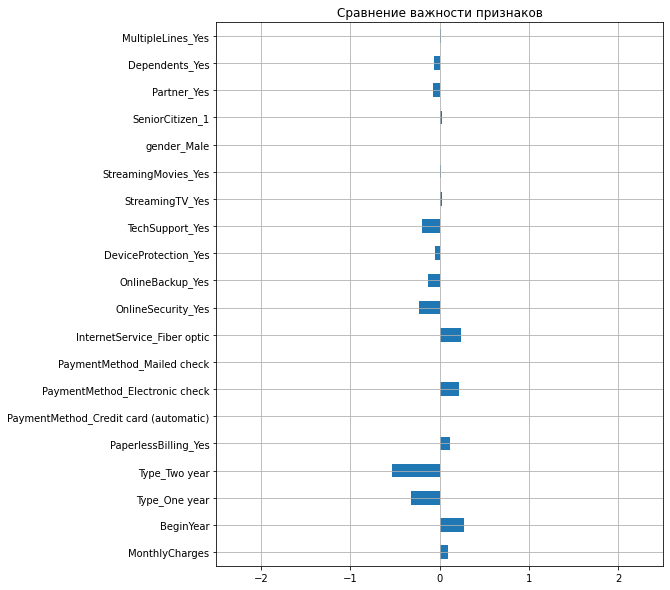

In [ ]:
log_reg_importance(lr_balanced_1, 
                   features_train_1_lr)

И отправим на валидацию

METRICS


,score
auc_roc,0.817241
accuracy,0.718042
f1,0.641292



CONFUSION MATRIX


,pred_neg,pred_pos
true_neg,514,238
true_pos,73,278


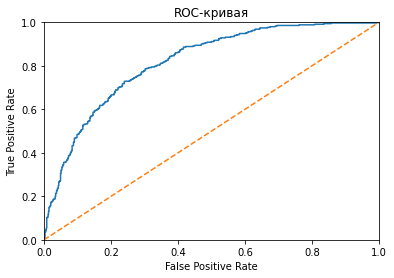

In [ ]:
auc_roc_valid_balanced_1_lr, accuracy_valid_balanced_1_lr, f1_valid_balanced_1_lr = evaluation(lr_balanced_1, 
                                                                                               target_valid_1, 
                                                                                               features_valid_1_lr)

In [ ]:
#lr_balanced_1.fit(features_valid_1_lr, target_valid_1)

##### Sample_2

In [ ]:
#features = ['TotalCharges']
features = ['CountMonthPaid']
features_train_2_lr, features_train_upsampled_2_lr, features_valid_2_lr, features_test_2_lr = feature_selection(2, features)

In [ ]:
lr_balanced_2, score_lr_balanced_2 = classification_fit(LogisticRegression(), 
                                                    features_train_2_lr, 
                                                    target_train_2, 
                                                    hyperparams = [{'penalty' : ["l1", "l2"],
                                                                    'solver':['liblinear', 'lbfgs'],
                                                                    'C':np.arange(0.1, 3, 0.1),
                                                                    'class_weight':['balanced'],
                                                                    'random_state': [12345]}],
                                                    splits=5)

best_params: {'C': 0.2, 'class_weight': 'balanced', 'penalty': 'l2', 'random_state': 12345, 'solver': 'lbfgs'}
best_score: 0.8310679046357518


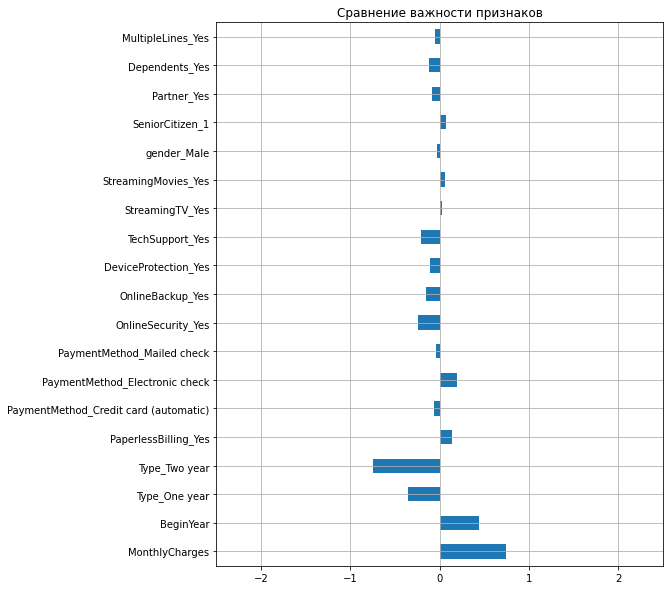

In [ ]:
log_reg_importance(lr_balanced_2, 
                   features_train_2_lr)

Валидация

METRICS


,score
auc_roc,0.819838
accuracy,0.709723
f1,0.591409



CONFUSION MATRIX


,pred_neg,pred_pos
true_neg,704,331
true_pos,78,296


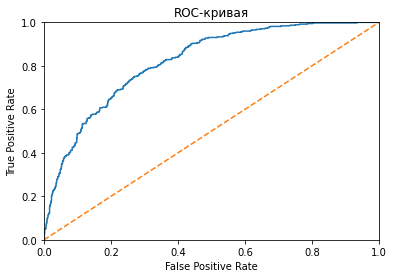

In [ ]:
auc_roc_valid_balanced_2_lr, accuracy_valid_balanced_2_lr, f1_valid_balanced_2_lr = evaluation(lr_balanced_2, 
                                                                                               target_valid_2, 
                                                                                               features_valid_2_lr)

#### Upsampling

##### Sample_1

In [ ]:
lr_upsampled_1, score_lr_upsampled_1 = classification_fit(LogisticRegression(), 
                                                    features_train_upsampled_1_lr, 
                                                    target_train_upsampled_1, 
                                                    hyperparams = [{'penalty' : ["l1", "l2"],
                                                                    'solver':['liblinear', 'lbfgs'],
                                                                    'C':np.arange(0.1, 3, 0.1),
                                                                    'class_weight':['balanced'],
                                                                    'random_state': [12345]}],
                                                    splits=5)

best_params: {'C': 0.6, 'class_weight': 'balanced', 'penalty': 'l2', 'random_state': 12345, 'solver': 'liblinear'}
best_score: 0.8010630849461131


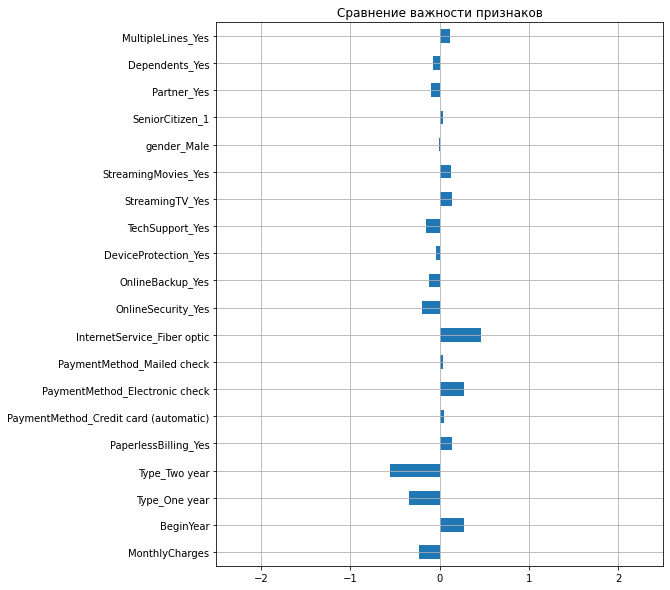

In [ ]:
log_reg_importance(lr_upsampled_1, 
                   features_train_upsampled_1_lr)

Валидация

METRICS


,score
auc_roc,0.818700
accuracy,0.724388
f1,0.647332



CONFUSION MATRIX


,pred_neg,pred_pos
true_neg,520,232
true_pos,72,279


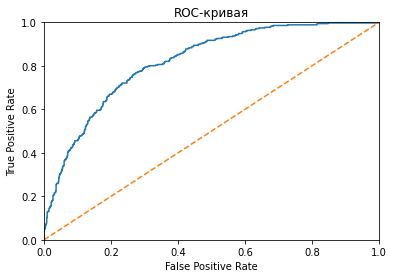

In [ ]:
auc_roc_valid_upsampled_1_lr, accuracy_valid_upsampled_1_lr, f1_valid_upsampled_1_lr = evaluation(lr_upsampled_1, 
                                                                                                  target_valid_1, 
                                                                                                  features_valid_1_lr)

##### Sample_2

In [ ]:
lr_upsampled_2, score_lr_upsampled_2 = classification_fit(LogisticRegression(), 
                                                    features_train_upsampled_2_lr, 
                                                    target_train_upsampled_2, 
                                                    hyperparams = [{'penalty' : ["l1", "l2"],
                                                                    'solver':['liblinear', 'lbfgs'],
                                                                    'C':np.arange(0.1, 3, 0.1),
                                                                    'class_weight':['balanced'],
                                                                    'random_state': [12345]}],
                                                    splits=5)

best_params: {'C': 0.1, 'class_weight': 'balanced', 'penalty': 'l2', 'random_state': 12345, 'solver': 'lbfgs'}
best_score: 0.8338323258184142


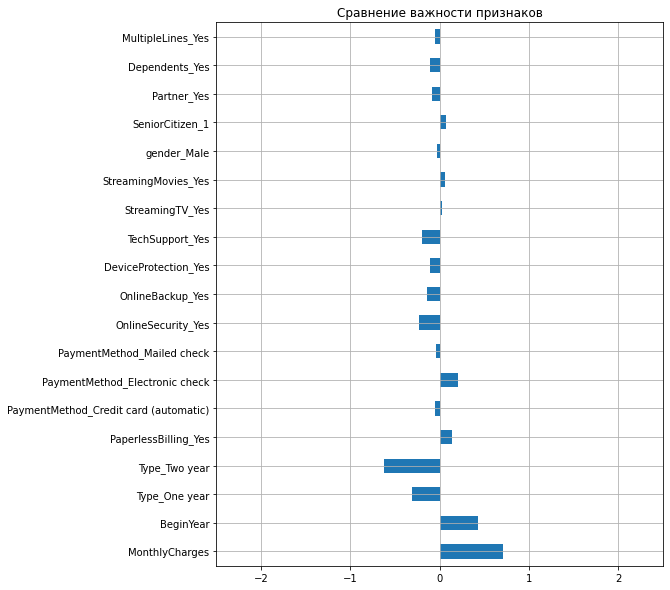

In [ ]:
log_reg_importance(lr_upsampled_2, 
                   features_train_upsampled_2_lr)

Валидация

METRICS


,score
auc_roc,0.819543
accuracy,0.709723
f1,0.591409



CONFUSION MATRIX


,pred_neg,pred_pos
true_neg,704,331
true_pos,78,296


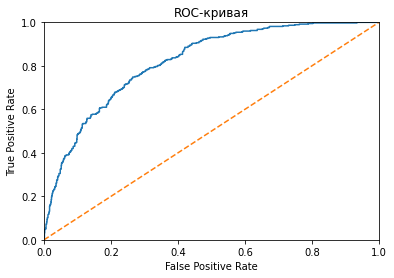

In [ ]:
auc_roc_valid_upsampled_2_lr, accuracy_valid_upsampled_2_lr, f1_valid_upsampled_2_lr = evaluation(lr_upsampled_2, 
                                                                                                  target_valid_2, 
                                                                                                  features_valid_2_lr)

METRICS


,score
auc_roc,0.819667
accuracy,0.745209
f1,0.623295



CONFUSION MATRIX


,pred_neg,pred_pos
true_neg,753,282
true_pos,77,297


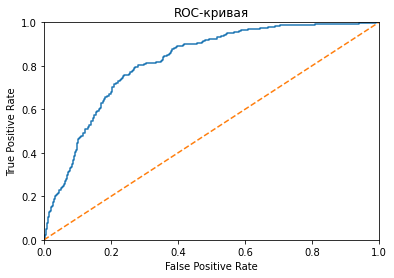

In [ ]:
auc_roc_test_upsampled_2_lr, accuracy_test_upsampled_2_lr, f1_test_upsampled_2_lr = evaluation(lr_upsampled_2, 
                                                                                               target_test_2, 
                                                                                               features_test_2_lr)

### RandomForestClassifier

#### Balanced class weight

##### Sample_1

In [ ]:
features = ['BeginYear']
features_train_1_forest, features_train_upsampled_1_forest, features_valid_1_forest, features_test_1_forest = feature_selection(1, features)

In [ ]:
forest_balanced_1, score_forest_balanced_1 = classification_fit(RandomForestClassifier(), 
                                                                features_train_1_forest, 
                                                                target_train_1, 
                                                                hyperparams = [{'n_estimators': range(60,160,20), 
                                                                                'max_depth': range(6,16,2), 
                                                                                'class_weight':['balanced'],
                                                                                'random_state': [12345]}],
                                                    splits=5)

best_params: {'class_weight': 'balanced', 'max_depth': 8, 'n_estimators': 80, 'random_state': 12345}
best_score: 0.8250297869665317


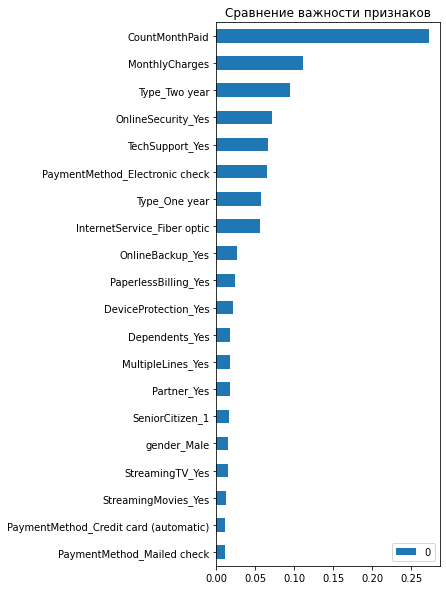

In [ ]:
ensemble_importance(forest_balanced_1, 
                    features_train_1_forest)

Валидация

METRICS


,score
auc_roc,0.846211
accuracy,0.755213
f1,0.653846



CONFUSION MATRIX


,pred_neg,pred_pos
true_neg,578,174
true_pos,96,255


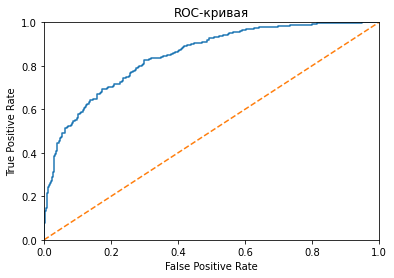

In [ ]:
auc_roc_valid_balanced_1_forest, accuracy_valid_balanced_1_forest, f1_valid_balanced_1_forest = evaluation(forest_balanced_1, 
                                                                                                           target_valid_1, 
                                                                                                           features_valid_1_forest)

##### Sample_2

In [ ]:
features = ['BeginYear']
features_train_2_forest, features_train_upsampled_2_forest, features_valid_2_forest, features_test_2_forest = feature_selection(2, features)

In [ ]:
forest_balanced_2, score_forest_balanced_2 = classification_fit(RandomForestClassifier(), 
                                                                features_train_2_forest, 
                                                                target_train_2, 
                                                                hyperparams = [{'n_estimators': range(60,160,20), 
                                                                                'max_depth': range(6,16,2), 
                                                                                'class_weight':['balanced'],
                                                                                'random_state': [12345]}],
                                                    splits=5)

best_params: {'class_weight': 'balanced', 'max_depth': 8, 'n_estimators': 100, 'random_state': 12345}
best_score: 0.8574469398621222


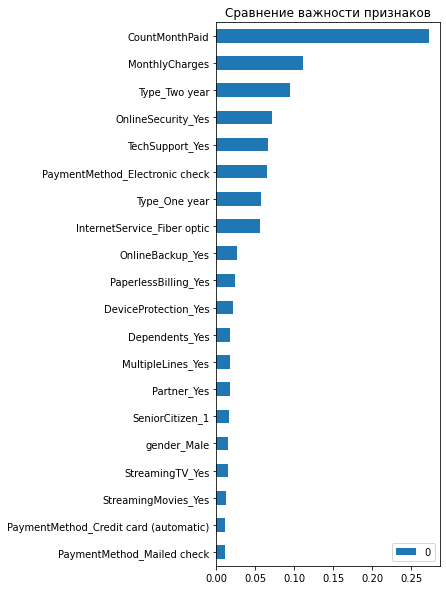

In [ ]:
ensemble_importance(forest_balanced_1, features_train_1_forest)

Валидация

METRICS


,score
auc_roc,0.844928
accuracy,0.747339
f1,0.613043



CONFUSION MATRIX


,pred_neg,pred_pos
true_neg,771,264
true_pos,92,282


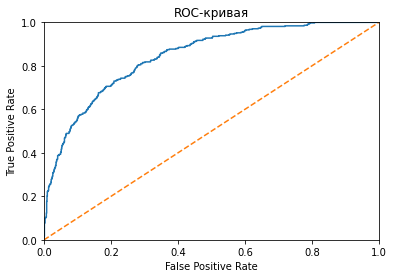

In [ ]:
auc_roc_valid_balanced_2_forest, accuracy_valid_balanced_2_forest, f1_valid_balanced_2_forest = evaluation(forest_balanced_2, 
                                                                                                           target_valid_2, 
                                                                                                           features_valid_2_forest)

#### Upsampling

##### Sample_1

In [ ]:
forest_upsampled_1, score_forest_upsampled_1 = classification_fit(RandomForestClassifier(), 
                                                    features_train_upsampled_1_forest, 
                                                    target_train_upsampled_1, 
                                                    hyperparams = [{'n_estimators': range(60,160,20), 
                                                                    'max_depth': range(6,16,2),
                                                                    'random_state': [12345]}],
                                                    splits=5)

best_params: {'max_depth': 14, 'n_estimators': 140, 'random_state': 12345}
best_score: 0.9263496260589121


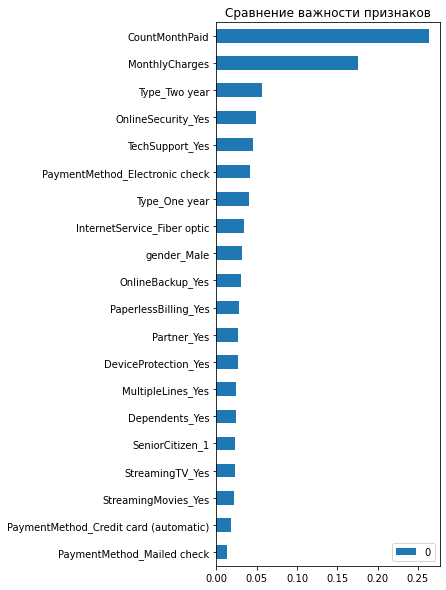

In [ ]:
ensemble_importance(forest_upsampled_1, features_train_upsampled_1_forest)

Валидация

METRICS


,score
auc_roc,0.836449
accuracy,0.771532
f1,0.654795



CONFUSION MATRIX


,pred_neg,pred_pos
true_neg,612,140
true_pos,112,239


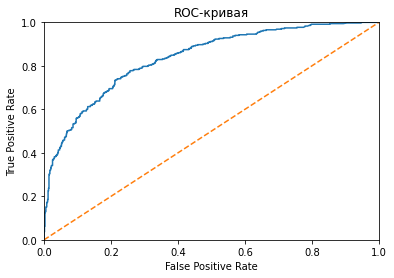

In [ ]:
auc_roc_valid_upsampled_1_forest, accuracy_valid_upsampled_1_forest, f1_valid_upsampled_1_forest = evaluation(forest_upsampled_1, 
                                                                                                              target_valid_1, 
                                                                                                              features_valid_1_forest)

##### Sample_2

In [ ]:
forest_upsampled_2, score_forest_upsampled_2 = classification_fit(RandomForestClassifier(), 
                                                    features_train_upsampled_2_forest, 
                                                    target_train_upsampled_2, 
                                                    hyperparams = [{'n_estimators': range(60,160,20), 
                                                                    'max_depth': range(6,16,2),
                                                                    'random_state': [12345]}],
                                                    splits=5)

best_params: {'max_depth': 14, 'n_estimators': 140, 'random_state': 12345}
best_score: 0.9750162399017551


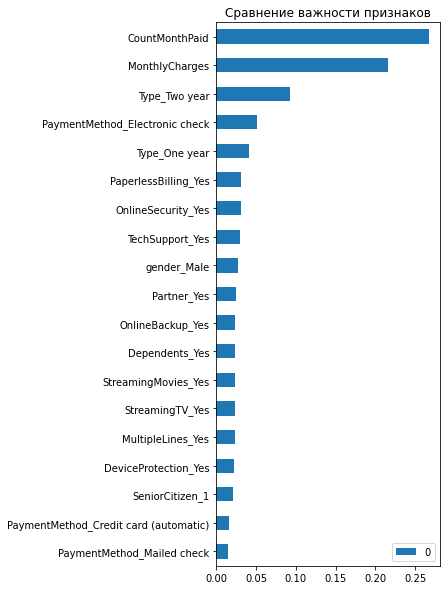

In [ ]:
ensemble_importance(forest_upsampled_2, features_train_upsampled_2_forest)

Валидация

METRICS


,score
auc_roc,0.833360
accuracy,0.775018
f1,0.611043



CONFUSION MATRIX


,pred_neg,pred_pos
true_neg,843,192
true_pos,125,249


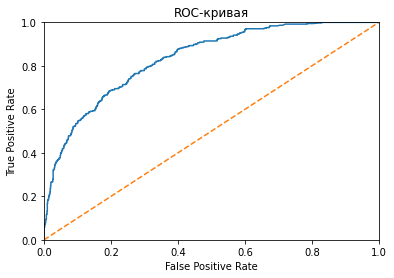

In [ ]:
auc_roc_valid_upsampled_2_forest, accuracy_valid_upsampled_2_forest, f1_valid_upsampled_2_forest = evaluation(forest_upsampled_2, 
                                                                                                              target_valid_2, 
                                                                                                              features_valid_2_forest)

### CatBoostClassifier

#### Balanced class weight

In [ ]:
disbalance = len(data_1.query('End == 0')) / len(data_1.query('End == 1'))

##### Sample_1

In [ ]:
features = ['BeginYear']
features_train_1_cat, features_train_upsampled_1_cat, features_valid_1_cat, features_test_1_cat = feature_selection(1, features)

In [ ]:
#cat = CatBoostClassifier(class_weights = [1,disbalance], eval_metric ='AUC:hints=skip_train~false', verbose=False)
#cat_params = {'learning_rate': [0.001, 0.1, 0.5], 
#              'depth': range(5,17,2)}
#pool = Pool(features_train_1_cat, target_train_1, 
#            cat_features=np.where(features_train_1_cat.dtypes != np.float)[0])
#cat_grid = cat.grid_search(cat_params,
#                           pool,
#                           cv=3,
#                           verbose=False,
#                           plot=False)
#print('best params', cat_grid['params'])

{'depth': 5, 'learning_rate': 0.1}

METRICS


,score
auc_roc,0.998427
accuracy,0.980363
f1,0.970005



CONFUSION MATRIX


,pred_neg,pred_pos
true_neg,2194,62
true_pos,3,1051


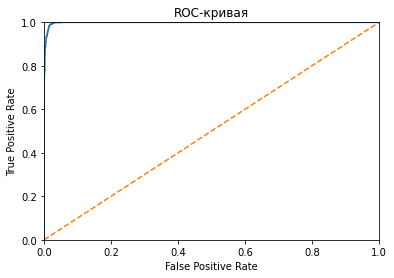

In [ ]:
cat_balanced_1 = CatBoostClassifier(class_weights = [1,disbalance], 
                                  eval_metric ='AUC:hints=skip_train~false', 
                                  learning_rate = 0.1, 
                                  depth = 5, 
                                  verbose=False, 
                                  random_state = 12345)
cat_balanced_1.fit(features_train_1_cat, target_train_1, 
                 cat_features=np.where(features_train_1_cat.dtypes != np.float)[0], 
                 verbose=False, plot=False)
auc_roc_train_balanced_1_cat, accuracy_train_balanced_1_cat, f1_train_balanced_1_cat = evaluation(cat_balanced_1, 
                                                                                                  target_train_1, 
                                                                                                  features_train_1_cat)

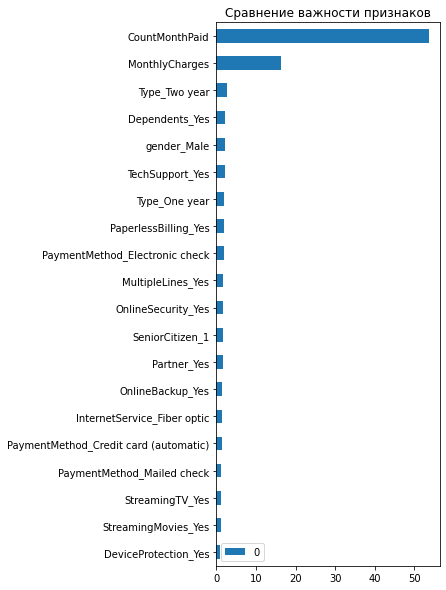

In [ ]:
ensemble_importance(cat_balanced_1, features_train_1_cat)

Валидация

METRICS


,score
auc_roc,0.913549
accuracy,0.855848
f1,0.769899



CONFUSION MATRIX


,pred_neg,pred_pos
true_neg,678,74
true_pos,85,266


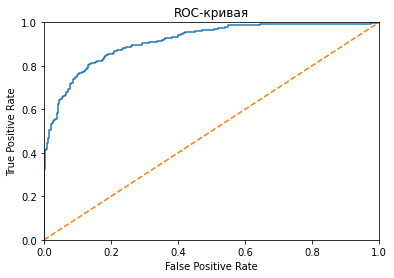

In [ ]:
auc_roc_valid_balanced_1_cat, accuracy_valid_balanced_1_cat, f1_valid_balanced_1_cat = evaluation(cat_balanced_1, 
                                                                                                  target_valid_1, 
                                                                                                  features_valid_1_cat)

##### Sample_2

In [ ]:
features = ['BeginYear']
features_train_2_cat, features_train_upsampled_2_cat, features_valid_2_cat, features_test_2_cat = feature_selection(2, features)

METRICS


,score
auc_roc,0.998690
accuracy,0.979882
f1,0.963092



CONFUSION MATRIX


,pred_neg,pred_pos
true_neg,3031,73
true_pos,12,1109


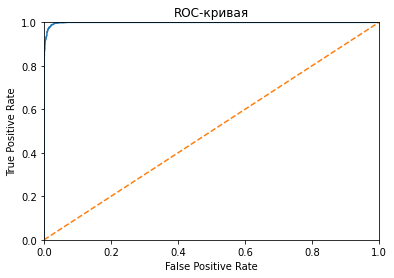

In [ ]:
cat_balanced_2 = CatBoostClassifier(class_weights = [1,disbalance], 
                                  eval_metric ='AUC:hints=skip_train~false', 
                                  learning_rate = 0.1, 
                                  depth = 5, 
                                  verbose=False,
                                  random_state=12345)
cat_balanced_2.fit(features_train_2_cat, target_train_2, 
                 cat_features=np.where(features_train_2_cat.dtypes != np.float)[0], 
                 verbose=False, plot=False)
auc_roc_train_balanced_2_cat, accuracy_train_balanced_2_cat, f1_train_balanced_2_cat = evaluation(cat_balanced_2, 
                                                                                                  target_train_2, 
                                                                                                  features_train_2_cat)

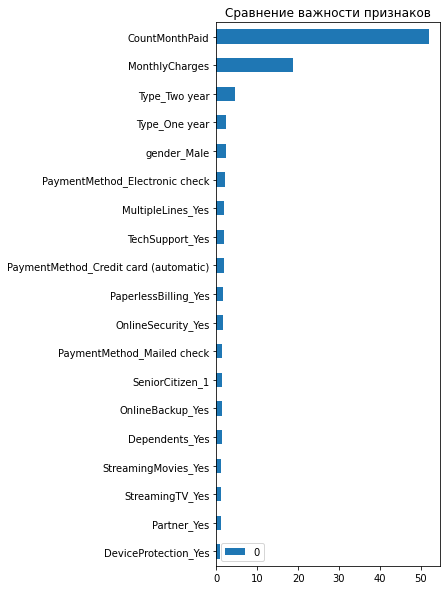

In [ ]:
ensemble_importance(cat_balanced_2, features_train_2_cat)

Валидация

METRICS


,score
auc_roc,0.906555
accuracy,0.848119
f1,0.716931



CONFUSION MATRIX


,pred_neg,pred_pos
true_neg,924,111
true_pos,103,271


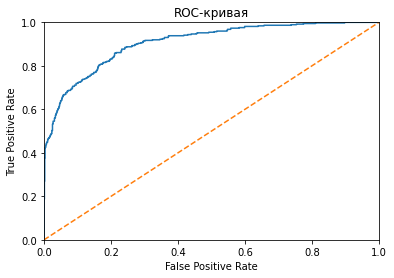

In [ ]:
auc_roc_valid_balanced_2_cat, accuracy_valid_balanced_2_cat, f1_valid_balanced_2_cat = evaluation(cat_balanced_2, 
                                                                                                  target_valid_2, 
                                                                                                  features_valid_2_cat)

#### Upsampling

##### Sample_1

METRICS


,score
auc_roc,0.997586
accuracy,0.973190
f1,0.972998



CONFUSION MATRIX


,pred_neg,pred_pos
true_neg,2139,117
true_pos,0,2108


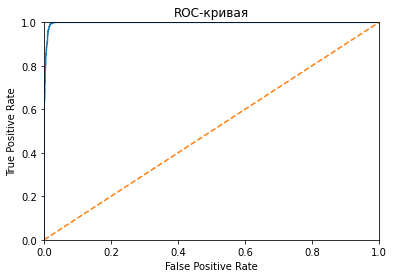

In [ ]:
cat_upsampled_1 = CatBoostClassifier(class_weights = [1,disbalance], 
                                  eval_metric ='AUC:hints=skip_train~false', 
                                  learning_rate = 0.1, 
                                  depth = 5, 
                                  verbose=False,
                                  random_state=12345)
cat_upsampled_1.fit(features_train_upsampled_1_cat, target_train_upsampled_1, 
                 cat_features=np.where(features_train_upsampled_1_cat.dtypes != np.float)[0], 
                 verbose=False, plot=False)
auc_roc_train_upsampled_1_cat, accuracy_train_upsampled_1_cat, f1_train_upsampled_1_cat = evaluation(cat_upsampled_1, 
                                                                                                     target_train_upsampled_1, 
                                                                                                     features_train_upsampled_1_cat)

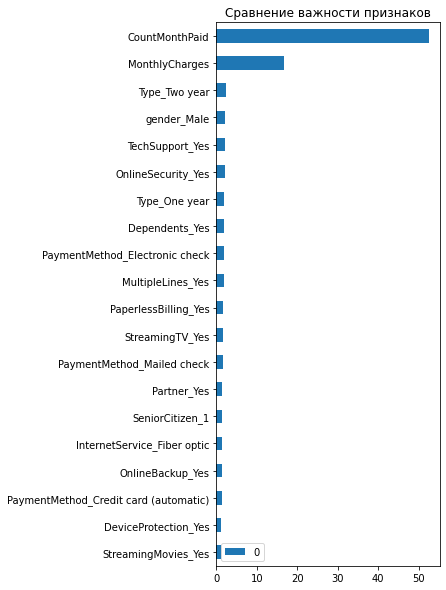

In [ ]:
ensemble_importance(cat_upsampled_1, features_train_1_cat)

Валидация

METRICS


,score
auc_roc,0.902399
accuracy,0.830462
f1,0.747638



CONFUSION MATRIX


,pred_neg,pred_pos
true_neg,639,113
true_pos,74,277


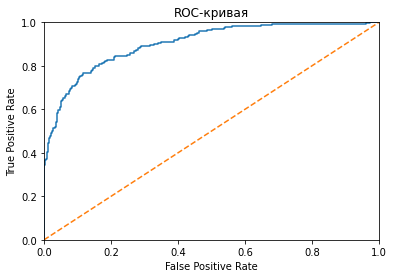

In [ ]:
auc_roc_valid_upsampled_1_cat, accuracy_valid_upsampled_1_cat, f1_valid_upsampled_1_cat = evaluation(cat_upsampled_1, 
                                                                                                     target_valid_1, 
                                                                                                     features_valid_1_cat)

##### Sample_2

METRICS


,score
auc_roc,0.996878
accuracy,0.963507
f1,0.966102



CONFUSION MATRIX


,pred_neg,pred_pos
true_neg,2868,236
true_pos,0,3363


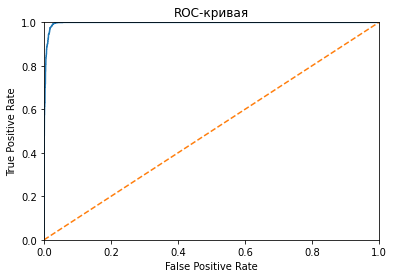

In [ ]:
cat_upsampled_2 = CatBoostClassifier(class_weights = [1,disbalance], 
                                  eval_metric ='AUC:hints=skip_train~false', 
                                  learning_rate = 0.1, 
                                  depth = 5, 
                                  verbose=False,
                                  random_state=12345)
cat_upsampled_2.fit(features_train_upsampled_2_cat, target_train_upsampled_2, 
                 cat_features=np.where(features_train_upsampled_2_cat.dtypes != np.float)[0], 
                 verbose=False, plot=False)
auc_roc_train_upsampled_2_cat, accuracy_train_upsampled_2_cat, f1_train_upsampled_2_cat = evaluation(cat_upsampled_2, 
                                                                                                     target_train_upsampled_2, 
                                                                                                     features_train_upsampled_2_cat)

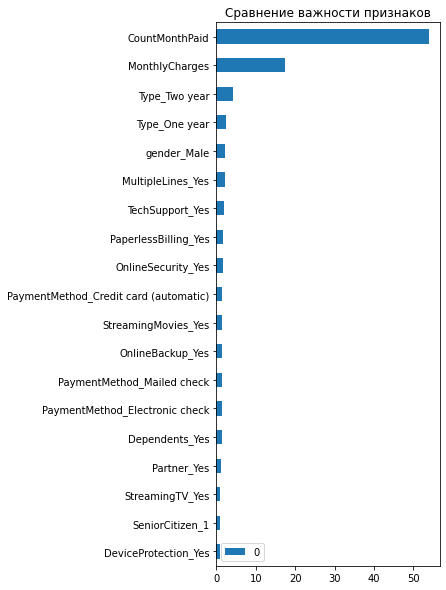

In [ ]:
ensemble_importance(cat_upsampled_2, features_train_2_cat)

Валидация

METRICS


,score
auc_roc,0.910541
accuracy,0.821150
f1,0.709677



CONFUSION MATRIX


,pred_neg,pred_pos
true_neg,849,186
true_pos,66,308


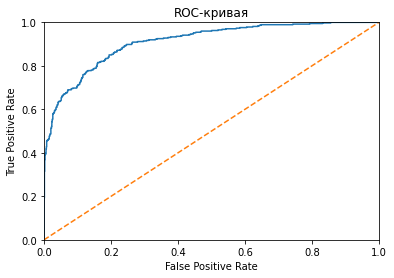

In [ ]:
auc_roc_valid_upsampled_2_cat, accuracy_valid_upsampled_2_cat, f1_valid_upsampled_2_cat = evaluation(cat_upsampled_2, 
                                                                                                     target_valid_2, 
                                                                                                     features_valid_2_cat)

### LGBMClassifier

#### Balanced class weight

##### Sample_1

In [ ]:
features = ['BeginYear']
features_train_1_lgbm, features_train_upsampled_1_lgbm, features_valid_1_lgbm, features_test_1_lgbm = feature_selection(1, features)

In [ ]:
lgbm_balanced_1, score_lgbm_balanced_1 = classification_fit(LGBMClassifier(), 
                                                                features_train_1_lgbm, 
                                                                target_train_1, 
                                                                hyperparams = [{'max_depth': range(5,17,2), 
                                                                                'learning_rate': [0.001, 0.01, 0.1, 0.5, 1], 
                                                                                'class_weight': ['balanced'],
                                                                                'random_state': [12345]}],
                                                             splits=5)

best_params: {'class_weight': 'balanced', 'learning_rate': 0.5, 'max_depth': 5, 'random_state': 12345}
best_score: 0.8615208574726196


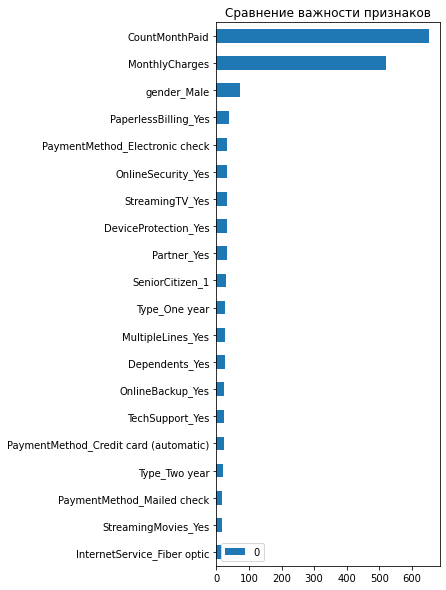

In [ ]:
ensemble_importance(lgbm_balanced_1, features_train_1_lgbm)

Валидация

METRICS


,score
auc_roc,0.877858
accuracy,0.797824
f1,0.688982



CONFUSION MATRIX


,pred_neg,pred_pos
true_neg,633,119
true_pos,104,247


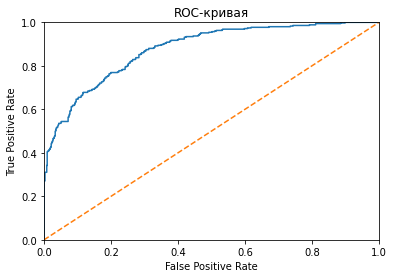

In [ ]:
auc_roc_valid_balanced_1_lgbm, accuracy_valid_balanced_1_lgbm, f1_valid_balanced_1_lgbm = evaluation(lgbm_balanced_1, 
                                                                                                     target_valid_1, 
                                                                                                     features_valid_1_lgbm)

##### Sample_2

In [ ]:
features = ['BeginYear']
features_train_2_lgbm, features_train_upsampled_2_lgbm, features_valid_2_lgbm, features_test_2_lgbm = feature_selection(2, features)

In [ ]:
lgbm_balanced_2, score_lgbm_balanced_2 = classification_fit(LGBMClassifier(), 
                                                                features_train_2_lgbm, 
                                                                target_train_2, 
                                                                hyperparams = [{'max_depth': range(5,17,2), 
                                                                                'learning_rate': [0.001, 0.01, 0.1, 0.5, 1], 
                                                                                'class_weight': ['balanced'],
                                                                                'random_state': [12345]}],
                                                             splits=5)

best_params: {'class_weight': 'balanced', 'learning_rate': 0.1, 'max_depth': 11, 'random_state': 12345}
best_score: 0.8800268830190638


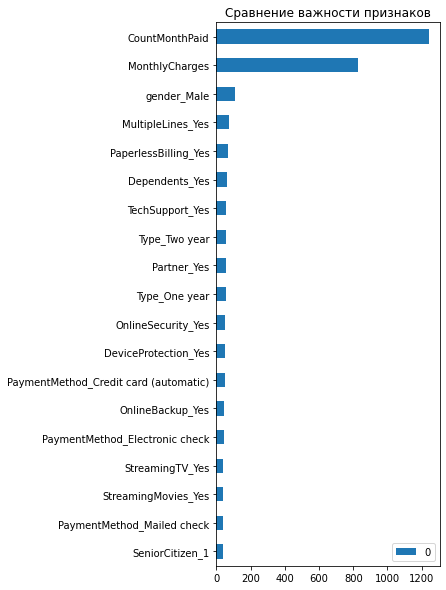

In [ ]:
ensemble_importance(lgbm_balanced_2, features_train_2_lgbm)

Валидация

METRICS


,score
auc_roc,0.872860
accuracy,0.796309
f1,0.666667



CONFUSION MATRIX


,pred_neg,pred_pos
true_neg,835,200
true_pos,87,287


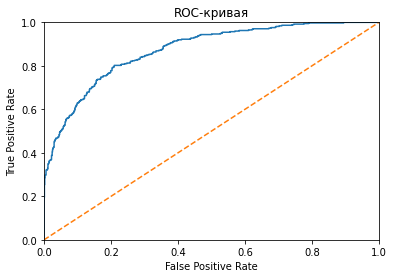

In [ ]:
auc_roc_valid_balanced_2_lgbm, accuracy_valid_balanced_2_lgbm, f1_valid_balanced_2_lgbm = evaluation(lgbm_balanced_2, 
                                                                                                     target_valid_2, 
                                                                                                     features_valid_2_lgbm)

#### Upsampling

##### Sample_1

In [ ]:
lgbm_upsampled_1, score_lgbm_upsampled_1 = classification_fit(LGBMClassifier(), 
                                                                features_train_upsampled_1_lgbm, 
                                                                target_train_upsampled_1, 
                                                                hyperparams = [{'max_depth': range(5,17,2), 
                                                                                'learning_rate': [0.001, 0.01, 0.1, 0.5, 1], 
                                                                                'class_weight': ['balanced'],
                                                                                'random_state': [12345]}],
                                                             splits=5)

best_params: {'class_weight': 'balanced', 'learning_rate': 0.5, 'max_depth': 9, 'random_state': 12345}
best_score: 0.9469092555581922


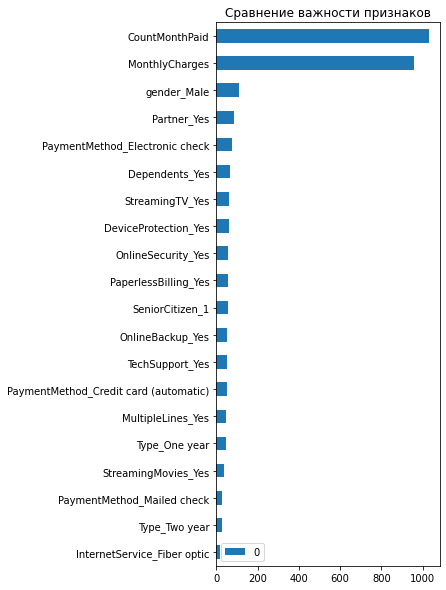

In [ ]:
ensemble_importance(lgbm_upsampled_1, features_train_1_lgbm)

Валидация

METRICS


,score
auc_roc,0.882456
accuracy,0.815050
f1,0.696429



CONFUSION MATRIX


,pred_neg,pred_pos
true_neg,665,87
true_pos,117,234


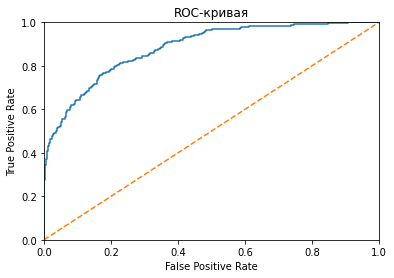

In [ ]:
auc_roc_valid_upsampled_1_lgbm, accuracy_valid_upsampled_1_lgbm, f1_valid_upsampled_1_lgbm = evaluation(lgbm_upsampled_1, 
                                                                                                        target_valid_1, 
                                                                                                        features_valid_1_lgbm)

##### Sample_2

In [ ]:
lgbm_upsampled_2, score_lgbm_upsampled_2 = classification_fit(LGBMClassifier(), 
                                                                features_train_upsampled_2_lgbm, 
                                                                target_train_upsampled_2, 
                                                                hyperparams = [{'max_depth': range(5,17,2), 
                                                                                'learning_rate': [0.001, 0.01, 0.1, 0.5, 1], 
                                                                                'class_weight': ['balanced'],
                                                                                'random_state': [12345]}],
                                                              splits=5)

best_params: {'class_weight': 'balanced', 'learning_rate': 1, 'max_depth': 13, 'random_state': 12345}
best_score: 0.9810118516422401


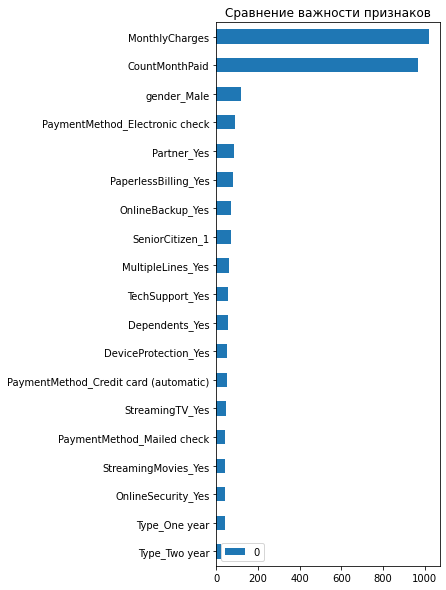

In [ ]:
ensemble_importance(lgbm_upsampled_2, features_train_2_lgbm)

Валидация

METRICS


,score
auc_roc,0.864406
accuracy,0.819730
f1,0.659517



CONFUSION MATRIX


,pred_neg,pred_pos
true_neg,909,126
true_pos,128,246


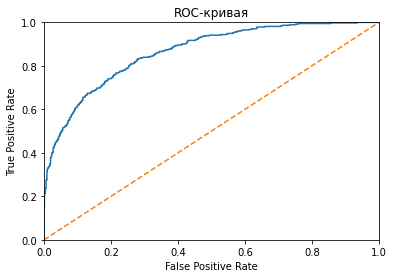

In [ ]:
auc_roc_valid_upsampled_2_lgbm, accuracy_valid_upsampled_2_lgbm, f1_valid_upsampled_2_lgbm = evaluation(lgbm_upsampled_2, 
                                                                                                        target_valid_2, 
                                                                                                        features_valid_2_lgbm)

### Сводная таблица

METRICS


,score
auc_roc,0.878548
accuracy,0.833215
f1,0.670407



CONFUSION MATRIX


,pred_neg,pred_pos
true_neg,935,100
true_pos,135,239


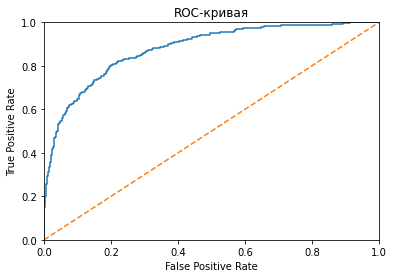

In [ ]:
auc_roc_test_upsampled_2_lgbm, accuracy_test_upsampled_2_lgbm, f1_test_upsampled_2_lgbm = evaluation(lgbm_upsampled_2, target_test_2, features_test_2_lgbm)

In [ ]:
validation_metrics = {
    'models': ['lr_balanced', 
               'lr_upsample', 
               'forest_balanced', 
               'forest_upsample', 
               'cat_balanced', 
               'cat_upsample', 
               'lgbm_balanced', 
               'lgbm_upsample'],
    'ROC_AUC sample 1': [auc_roc_valid_balanced_1_lr, 
                         auc_roc_valid_upsampled_1_lr, 
                         auc_roc_valid_balanced_1_forest, 
                         auc_roc_valid_upsampled_1_forest, 
                         auc_roc_valid_balanced_1_cat, 
                         auc_roc_valid_upsampled_1_cat, 
                         auc_roc_valid_balanced_1_lgbm, 
                         auc_roc_valid_upsampled_1_lgbm],
    'ACCURACY sample 1': [accuracy_valid_balanced_1_lr, 
                         accuracy_valid_upsampled_1_lr, 
                         accuracy_valid_balanced_1_forest, 
                         accuracy_valid_upsampled_1_forest, 
                         accuracy_valid_balanced_1_cat, 
                         accuracy_valid_upsampled_1_cat, 
                         accuracy_valid_balanced_1_lgbm, 
                         accuracy_valid_upsampled_1_lgbm],
    'F1 sample 1': [f1_valid_balanced_1_lr, 
                         f1_valid_upsampled_1_lr, 
                         f1_valid_balanced_1_forest, 
                         f1_valid_upsampled_1_forest, 
                         f1_valid_balanced_1_cat, 
                         f1_valid_upsampled_1_cat, 
                         f1_valid_balanced_1_lgbm, 
                         f1_valid_upsampled_1_lgbm],
    'ROC_AUC sample 2': [auc_roc_valid_balanced_2_lr, 
                         auc_roc_valid_upsampled_2_lr, 
                         auc_roc_valid_balanced_2_forest, 
                         auc_roc_valid_upsampled_2_forest, 
                         auc_roc_valid_balanced_2_cat, 
                         auc_roc_valid_upsampled_2_cat, 
                         auc_roc_valid_balanced_2_lgbm, 
                         auc_roc_valid_upsampled_2_lgbm],
    'ACCURACY sample 2': [accuracy_valid_balanced_2_lr, 
                         accuracy_valid_upsampled_2_lr, 
                         accuracy_valid_balanced_2_forest, 
                         accuracy_valid_upsampled_2_forest, 
                         accuracy_valid_balanced_2_cat, 
                         accuracy_valid_upsampled_2_cat, 
                         accuracy_valid_balanced_2_lgbm, 
                         accuracy_valid_upsampled_2_lgbm],
    'F1 sample 2': [f1_valid_balanced_2_lr, 
                         f1_valid_upsampled_2_lr, 
                         f1_valid_balanced_2_forest, 
                         f1_valid_upsampled_2_forest, 
                         f1_valid_balanced_2_cat, 
                         f1_valid_upsampled_2_cat, 
                         f1_valid_balanced_2_lgbm, 
                         f1_valid_upsampled_2_lgbm]
}
validation_metrics = pd.DataFrame(validation_metrics).set_index('models')
validation_metrics

,ROC_AUC sample 1,ACCURACY sample 1,F1 sample 1,ROC_AUC sample 2,ACCURACY sample 2,F1 sample 2
models,,,,,,
lr_balanced,0.817241,0.718042,0.641292,0.819838,0.709723,0.591409
lr_upsample,0.818700,0.724388,0.647332,0.819543,0.709723,0.591409
forest_balanced,0.846211,0.755213,0.653846,0.844928,0.747339,0.613043
forest_upsample,0.836449,0.771532,0.654795,0.833360,0.775018,0.611043
cat_balanced,0.913549,0.855848,0.769899,0.906555,0.848119,0.716931
cat_upsample,0.902399,0.830462,0.747638,0.910541,0.821150,0.709677
lgbm_balanced,0.877858,0.797824,0.688982,0.872860,0.796309,0.666667
lgbm_upsample,0.882456,0.815050,0.696429,0.864406,0.819730,0.659517


In [ ]:
validation_metrics['ROC_AUC sample 1'].max()

0.9135486755167607

На первой выборке наибольшего roc_auc на валидации мы добились при помощи сбалансированного кэтбуста

In [ ]:
validation_metrics['ROC_AUC sample 2'].max()

0.9105414761424991

На второй выборке - при помощи upsempling и кэтбуста.

### Вывод

Валидация показала хорошие результаты. Меньше всего ошибок у моделей CatBoost.

## Тестирование

### LogisticRegression

#### Balanced class weight

##### Sample_1

METRICS


,score
auc_roc,0.808103
accuracy,0.719203
f1,0.647727



CONFUSION MATRIX


,pred_neg,pred_pos
true_neg,509,244
true_pos,66,285


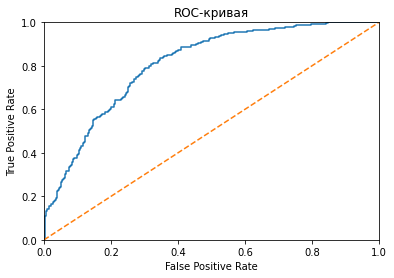

In [ ]:
auc_roc_test_balanced_1_lr, accuracy_test_balanced_1_lr, f1_test_balanced_1_lr = evaluation(lr_balanced_1, 
                                                                                            target_test_1, 
                                                                                            features_test_1_lr)

##### Sample_2

METRICS


,score
auc_roc,0.819809
accuracy,0.745209
f1,0.623295



CONFUSION MATRIX


,pred_neg,pred_pos
true_neg,753,282
true_pos,77,297


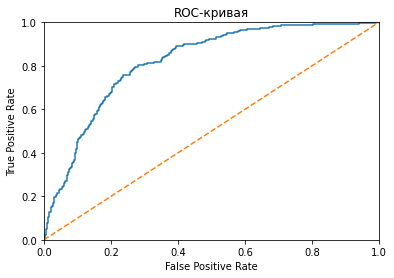

In [ ]:
auc_roc_test_balanced_2_lr, accuracy_test_balanced_2_lr, f1_test_balanced_2_lr = evaluation(lr_balanced_2, 
                                                                                            target_test_2, 
                                                                                            features_test_2_lr)

#### Upsampling

##### Sample_1

METRICS


,score
auc_roc,0.809495
accuracy,0.724638
f1,0.651376



CONFUSION MATRIX


,pred_neg,pred_pos
true_neg,516,237
true_pos,67,284


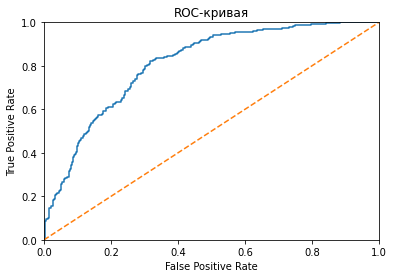

In [ ]:
auc_roc_test_upsampled_1_lr, accuracy_test_upsampled_1_lr, f1_test_upsampled_1_lr = evaluation(lr_upsampled_1, 
                                                                                               target_test_1, 
                                                                                               features_test_1_lr)

##### Sample_2

METRICS


,score
auc_roc,0.819667
accuracy,0.745209
f1,0.623295



CONFUSION MATRIX


,pred_neg,pred_pos
true_neg,753,282
true_pos,77,297


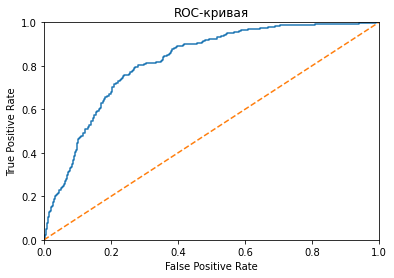

In [ ]:
auc_roc_test_upsampled_2_lr, accuracy_test_upsampled_2_lr, f1_test_upsampled_2_lr = evaluation(lr_upsampled_2, 
                                                                                               target_test_2, 
                                                                                               features_test_2_lr)

### RandomForestClassifier

#### Balanced class weight

##### Sample_1

METRICS


,score
auc_roc,0.837471
accuracy,0.758152
f1,0.662453



CONFUSION MATRIX


,pred_neg,pred_pos
true_neg,575,178
true_pos,89,262


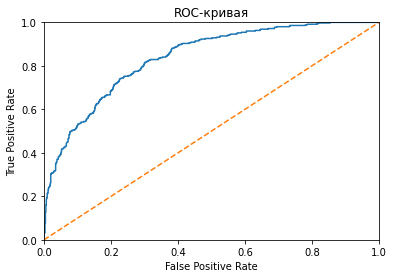

In [ ]:
auc_roc_test_balanced_1_forest, accuracy_test_balanced_1_forest, f1_test_balanced_1_forest = evaluation(forest_balanced_1, 
                                                                                                        target_test_1, 
                                                                                                        features_test_1_forest)

##### Sample_2

METRICS


,score
auc_roc,0.848628
accuracy,0.780696
f1,0.646857



CONFUSION MATRIX


,pred_neg,pred_pos
true_neg,817,218
true_pos,91,283


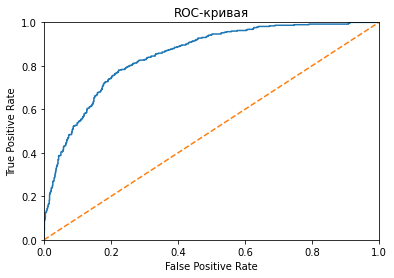

In [ ]:
auc_roc_test_balanced_2_forest, accuracy_test_balanced_2_forest, f1_test_balanced_2_forest = evaluation(forest_balanced_2, 
                                                                                                        target_test_2, 
                                                                                                        features_test_2_forest)

#### Upsampling

##### Sample_1

METRICS


,score
auc_roc,0.822439
accuracy,0.751812
f1,0.632708



CONFUSION MATRIX


,pred_neg,pred_pos
true_neg,594,159
true_pos,115,236


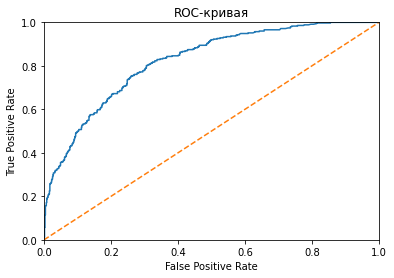

In [ ]:
auc_roc_test_upsampled_1_forest, accuracy_test_upsampled_1_forest, f1_test_upsampled_1_forest = evaluation(forest_upsampled_1, 
                                                                                                           target_test_1, 
                                                                                                           features_test_1_forest)

##### Sample_2

METRICS


,score
auc_roc,0.839442
accuracy,0.774308
f1,0.600503



CONFUSION MATRIX


,pred_neg,pred_pos
true_neg,852,183
true_pos,135,239


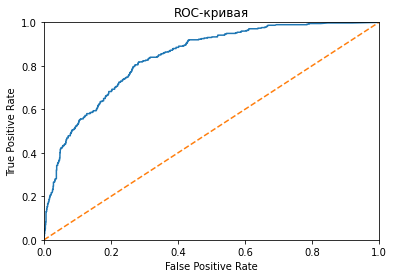

In [ ]:
auc_roc_test_upsampled_2_forest, accuracy_test_upsampled_2_forest, f1_test_upsampled_2_forest = evaluation(forest_upsampled_2, 
                                                                                                           target_test_2, 
                                                                                                           features_test_2_forest)

### CatBoostClassifier

#### Balanced class weight

##### Sample_1

METRICS


,score
auc_roc,0.912727
accuracy,0.845109
f1,0.761506



CONFUSION MATRIX


,pred_neg,pred_pos
true_neg,660,93
true_pos,78,273


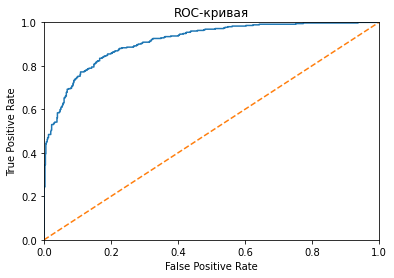

In [ ]:
auc_roc_test_balanced_1_cat, accuracy_test_balanced_1_cat, f1_test_balanced_1_cat = evaluation(cat_balanced_1, 
                                                                                               target_test_1, 
                                                                                               features_test_1_cat)

##### Sample_2

METRICS


,score
auc_roc,0.911057
accuracy,0.863023
f1,0.730823



CONFUSION MATRIX


,pred_neg,pred_pos
true_neg,954,81
true_pos,112,262


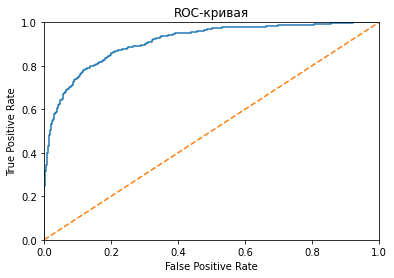

In [ ]:
auc_roc_test_balanced_2_cat, accuracy_test_balanced_2_cat, f1_test_balanced_2_cat = evaluation(cat_balanced_2, 
                                                                                               target_test_2, 
                                                                                               features_test_2_cat)

#### Upsampling

##### Sample_1

METRICS


,score
auc_roc,0.907797
accuracy,0.820652
f1,0.742187



CONFUSION MATRIX


,pred_neg,pred_pos
true_neg,621,132
true_pos,66,285


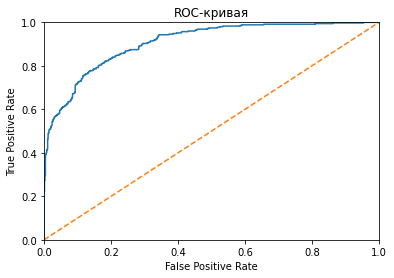

In [ ]:
auc_roc_test_upsampled_1_cat, accuracy_test_upsampled_1_cat, f1_test_upsampled_1_cat = evaluation(cat_upsampled_1, 
                                                                                                  target_test_1, 
                                                                                                  features_test_1_cat)

##### Sample_2

METRICS


,score
auc_roc,0.914147
accuracy,0.845280
f1,0.736077



CONFUSION MATRIX


,pred_neg,pred_pos
true_neg,887,148
true_pos,70,304


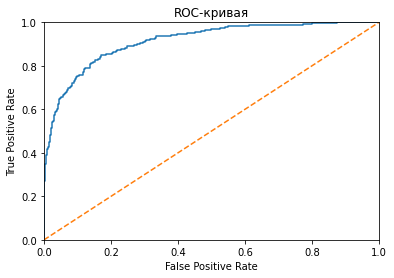

In [ ]:
auc_roc_test_upsampled_2_cat, accuracy_test_upsampled_2_cat, f1_test_upsampled_2_cat = evaluation(cat_upsampled_2, 
                                                                                                  target_test_2, 
                                                                                                  features_test_2_cat)

### LGBMClassifier

#### Balanced class weight

##### Sample_1

METRICS


,score
auc_roc,0.885160
accuracy,0.808877
f1,0.716779



CONFUSION MATRIX


,pred_neg,pred_pos
true_neg,626,127
true_pos,84,267


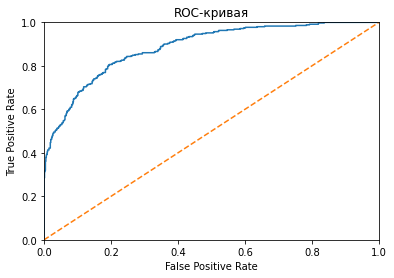

In [ ]:
auc_roc_test_balanced_1_lgbm, accuracy_test_balanced_1_lgbm, f1_test_balanced_1_lgbm = evaluation(lgbm_balanced_1, 
                                                                                                  target_test_1, 
                                                                                                  features_test_1_lgbm)

##### Sample_2

METRICS


,score
auc_roc,0.885547
accuracy,0.826118
f1,0.700122



CONFUSION MATRIX


,pred_neg,pred_pos
true_neg,878,157
true_pos,88,286


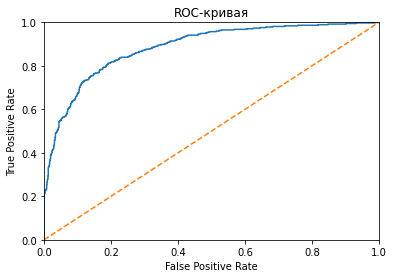

In [ ]:
auc_roc_test_balanced_2_lgbm, accuracy_test_balanced_2_lgbm, f1_test_balanced_2_lgbm = evaluation(lgbm_balanced_2, 
                                                                                                  target_test_2, 
                                                                                                  features_test_2_lgbm)

#### Upsampling

##### Sample_1

METRICS


,score
auc_roc,0.882678
accuracy,0.815217
f1,0.718232



CONFUSION MATRIX


,pred_neg,pred_pos
true_neg,640,113
true_pos,91,260


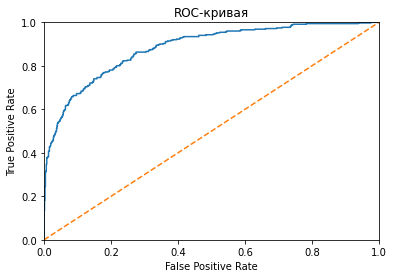

In [ ]:
auc_roc_test_upsampled_1_lgbm, accuracy_test_upsampled_1_lgbm, f1_test_upsampled_1_lgbm = evaluation(lgbm_upsampled_1, 
                                                                                                     target_test_1, 
                                                                                                     features_test_1_lgbm)

##### Sample_2

METRICS


,score
auc_roc,0.878548
accuracy,0.833215
f1,0.670407



CONFUSION MATRIX


,pred_neg,pred_pos
true_neg,935,100
true_pos,135,239


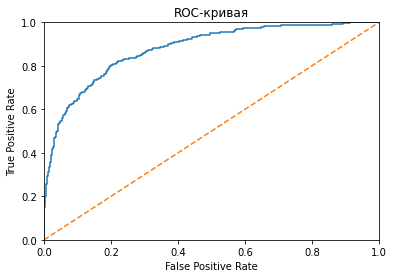

In [ ]:
auc_roc_test_upsampled_2_lgbm, accuracy_test_upsampled_2_lgbm, f1_test_upsampled_2_lgbm = evaluation(lgbm_upsampled_2, 
                                                                                                     target_test_2, 
                                                                                                     features_test_2_lgbm)

### Сводная таблица

In [ ]:
test_metrics = {
    'models': ['lr_balanced', 
               'lr_upsample', 
               'forest_balanced', 
               'forest_upsample', 
               'cat_balanced', 
               'cat_upsample', 
               'lgbm_balanced', 
               'lgbm_upsample'],
    'ROC_AUC sample 1': [auc_roc_test_balanced_1_lr, 
                         auc_roc_test_upsampled_1_lr, 
                         auc_roc_test_balanced_1_forest, 
                         auc_roc_test_upsampled_1_forest, 
                         auc_roc_test_balanced_1_cat, 
                         auc_roc_test_upsampled_1_cat, 
                         auc_roc_test_balanced_1_lgbm, 
                         auc_roc_test_upsampled_1_lgbm],
    'ACCURACY sample 1': [accuracy_test_balanced_1_lr, 
                         accuracy_test_upsampled_1_lr, 
                         accuracy_test_balanced_1_forest, 
                         accuracy_test_upsampled_1_forest, 
                         accuracy_test_balanced_1_cat, 
                         accuracy_test_upsampled_1_cat, 
                         accuracy_test_balanced_1_lgbm, 
                         accuracy_test_upsampled_1_lgbm],
    'F1 sample 1': [f1_test_balanced_1_lr, 
                         f1_test_upsampled_1_lr, 
                         f1_test_balanced_1_forest, 
                         f1_test_upsampled_1_forest, 
                         f1_test_balanced_1_cat, 
                         f1_test_upsampled_1_cat, 
                         f1_test_balanced_1_lgbm, 
                         f1_test_upsampled_1_lgbm],
    'ROC_AUC sample 2': [auc_roc_test_balanced_2_lr, 
                         auc_roc_test_upsampled_2_lr, 
                         auc_roc_test_balanced_2_forest, 
                         auc_roc_test_upsampled_2_forest, 
                         auc_roc_test_balanced_2_cat, 
                         auc_roc_test_upsampled_2_cat, 
                         auc_roc_test_balanced_2_lgbm, 
                         auc_roc_test_upsampled_2_lgbm],
    'ACCURACY sample 2': [accuracy_test_balanced_2_lr, 
                         accuracy_test_upsampled_2_lr, 
                         accuracy_test_balanced_2_forest, 
                         accuracy_test_upsampled_2_forest, 
                         accuracy_test_balanced_2_cat, 
                         accuracy_test_upsampled_2_cat, 
                         accuracy_test_balanced_2_lgbm, 
                         accuracy_test_upsampled_2_lgbm],
    'F1 sample 2': [f1_test_balanced_2_lr, 
                         f1_test_upsampled_2_lr, 
                         f1_test_balanced_2_forest, 
                         f1_test_upsampled_2_forest, 
                         f1_test_balanced_2_cat, 
                         f1_test_upsampled_2_cat, 
                         f1_test_balanced_2_lgbm, 
                         f1_test_upsampled_2_lgbm]
}
test_metrics = pd.DataFrame(test_metrics).set_index('models')

### Лучшая метрика, полученная на первом датасете (с удаленными пропусками)

In [ ]:
print('Самого высокого показателя ROC-AUC (для выборки с удаленными пропусками), равного', 
      test_metrics['ROC_AUC sample 1'].max(), 
      'удалось достичь при помощи модели', 
      test_metrics[test_metrics['ROC_AUC sample 1'] == test_metrics['ROC_AUC sample 1'].max()].index[0])

Самого высокого показателя ROC-AUC (для выборки с удаленными пропусками), равного 0.9127270594734075 удалось достичь при помощи модели cat_balanced


Для выборки с удаленными пропусками самый высокий auc добыл сбалансированный кэтбуст.

In [ ]:
test_metrics.sort_values(by='ROC_AUC sample 1', ascending=False)

,ROC_AUC sample 1,ACCURACY sample 1,F1 sample 1,ROC_AUC sample 2,ACCURACY sample 2,F1 sample 2
models,,,,,,
cat_balanced,0.912727,0.845109,0.761506,0.911057,0.863023,0.730823
cat_upsample,0.907797,0.820652,0.742187,0.914147,0.845280,0.736077
lgbm_balanced,0.885160,0.808877,0.716779,0.885547,0.826118,0.700122
lgbm_upsample,0.882678,0.815217,0.718232,0.878548,0.833215,0.670407
forest_balanced,0.837471,0.758152,0.662453,0.848628,0.780696,0.646857
forest_upsample,0.822439,0.751812,0.632708,0.839442,0.774308,0.600503
lr_upsample,0.809495,0.724638,0.651376,0.819667,0.745209,0.623295
lr_balanced,0.808103,0.719203,0.647727,0.819809,0.745209,0.623295


### Лучшая метрика, полученная на первом датасете (с удаленным признаком, содержащим пропуски)

In [ ]:
print('Самого высокого показателя ROC-AUC (для выборки с удаленным признаком, содержащим пропуски), равного', 
      test_metrics['ROC_AUC sample 2'].max(), 
      'удалось достичь при помощи модели', 
      test_metrics[test_metrics['ROC_AUC sample 2'] == test_metrics['ROC_AUC sample 2'].max()].index[0])

Самого высокого показателя ROC-AUC (для выборки с удаленным признаком, содержащим пропуски), равного 0.9141465808984992 удалось достичь при помощи модели cat_upsample


Для выборки с удаленным признаком, содержащим пропуски и увеличенной до равных классов лучшую метрику добыл несбалансированный кэтбуст

In [ ]:
test_metrics.sort_values(by='ROC_AUC sample 2', ascending=False)

,ROC_AUC sample 1,ACCURACY sample 1,F1 sample 1,ROC_AUC sample 2,ACCURACY sample 2,F1 sample 2
models,,,,,,
cat_upsample,0.907797,0.820652,0.742187,0.914147,0.845280,0.736077
cat_balanced,0.912727,0.845109,0.761506,0.911057,0.863023,0.730823
lgbm_balanced,0.885160,0.808877,0.716779,0.885547,0.826118,0.700122
lgbm_upsample,0.882678,0.815217,0.718232,0.878548,0.833215,0.670407
forest_balanced,0.837471,0.758152,0.662453,0.848628,0.780696,0.646857
forest_upsample,0.822439,0.751812,0.632708,0.839442,0.774308,0.600503
lr_balanced,0.808103,0.719203,0.647727,0.819809,0.745209,0.623295
lr_upsample,0.809495,0.724638,0.651376,0.819667,0.745209,0.623295


### Вывод

CatBoost выдавал самый высокий и стабильный результат на обеих выборках. Следующим в рейтинге идет LGBMClassifier. Случайный лес и логистическая регрессия дали неплохие, но недостаточно высокие результаты. Случайный лес оказался весьма капризен в плане подбора признаков и настройки гиперпараметров. Возможно, от него можно было бы добиться большего. 

## Вывод

Мы провели предобработку и анализ данных, полученных от оператора связи. В результате анализа были обнаружены заслуживающие внимания особенности:
* с возрастанием года заключения договора растёт вероятность ухода клиента
* ежемесячная плата ушедшего клиента выше ежемесячной платы оставшегося
* в целом оба эти вида ежемесячной платы со временем падают
* ушедшие клиенты предпочитали оптоволоконный интернет и соответствующие ему услуги
* а платить предпочитали помесячно (оставшимся нравится также платить вперёд).

Возможно, перед принятием решения о привлекающих внимание потенциально уходящих клиентов мероприятиях имеет смысл проверить качество оптоволоконного интернета и его стандартного обслуживания. 

Также мы обучили несколько моделей с целью определить клиентов, которые потенциально могут покинуть оператора. Лучших показателей (**roc_auc 0.912727 и 0.914147**) достигли две модели CatBoost, при помощи которых оператор сможет выбрать, какому клиенту выслать промокод, а какой и так лоялен. 